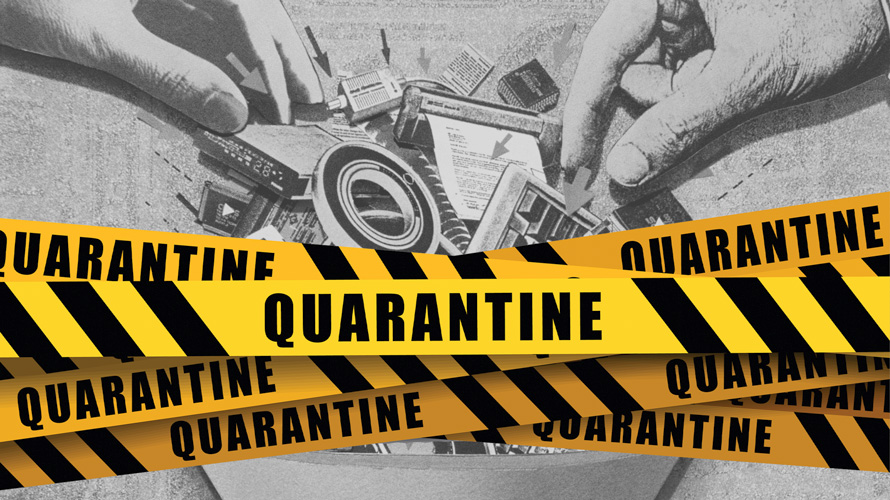

# Project Objective:
  Video games are a billion-dollar business and have been for many years. With 2020 consumed almost entirely by the COVID-19 pandemic, more than half of US residents turned to video games to fill the time. While movie theaters, sports, plays, and other entertainments have been largely inaccessible, video games quickly filled in the blank and displayed enormous potential. video games transcend age, gender and where we live. During the time of lockdown, video games could provide mental stimulation, relaxation, and help to connect us.

Although the gaming industry has a huge potential, not all games or game companies can benefit from it easily. Just like movies, some games attract millions of players and income every year, while some games receive no attention or only negative comments. In our project, we aim to decipher the secret of popular video games. By looking at games data on Steam and game reviews on Metacritic, we hope to find the essential elements that make a video game successful.


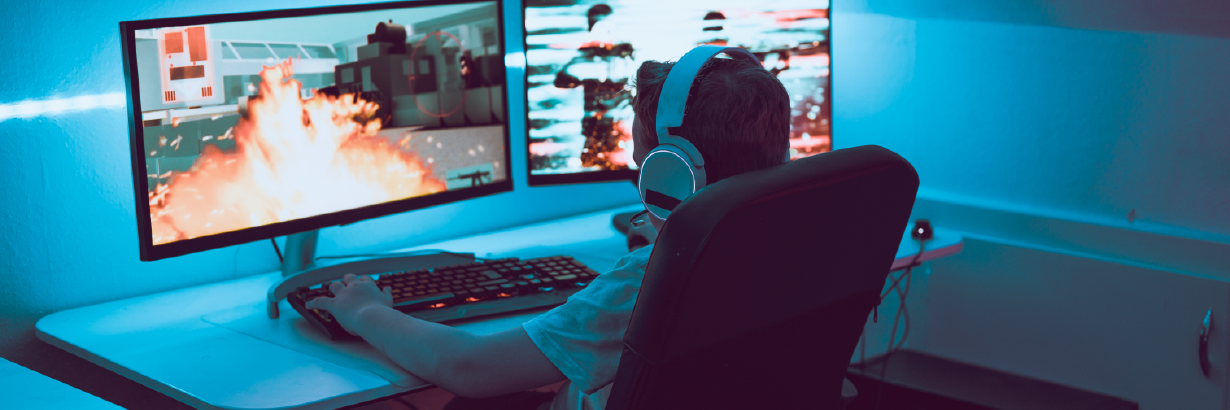

# Data Loading and Initial Setup

In [ ]:
!pip3 install pandas==1.0.5

In [ ]:
!pip install py_stringsimjoin # ngrams similarity join
import py_stringsimjoin as ssj
import py_stringmatching as sm

In [ ]:
%%capture

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import pyplot
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import json

Data Sources and Links:
*   Steam Dataset: https://www.kaggle.com/nikdavis/steam-store-games

*   Metacritic Game Dataset(1381): https://www.kaggle.com/dahlia25/metacritic-video-game-comments


In [ ]:
# download clean steam data from google drive
!gdown 'https://drive.google.com/uc?id=177H_2JUmOBKtN0CSgSGe659uMDqdt2wC'

# steam_description data
!gdown 'https://drive.google.com/uc?id=109QyCI_FqQbmrmgMMG6rDlUTMUcPelky'

# download meta_game_info.csv
!gdown 'https://drive.google.com/uc?id=1KZXhgHcYuOsSFxEO-ZLc5dEet49hv6Ti'

# download metacritic_game_user_comments.csv
!gdown 'https://drive.google.com/uc?id=18vutZoLdMwmXcVVW18GzZfUQh8nWTJki'

Downloading...
From: https://drive.google.com/uc?id=177H_2JUmOBKtN0CSgSGe659uMDqdt2wC
To: /content/steam.csv
5.82MB [00:00, 22.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=109QyCI_FqQbmrmgMMG6rDlUTMUcPelky
To: /content/steam_description_data.csv
94.7MB [00:03, 26.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KZXhgHcYuOsSFxEO-ZLc5dEet49hv6Ti
To: /content/metacritic_game_info.csv
100% 558k/558k [00:00<00:00, 3.40MB/s]
Downloading...
From: https://drive.google.com/uc?id=18vutZoLdMwmXcVVW18GzZfUQh8nWTJki
To: /content/metacritic_game_user_comments.csv
265MB [00:04, 59.8MB/s]


In [ ]:
# import data
steam_data = pd.read_csv('steam.csv')
steam_des = pd.read_csv('steam_description_data.csv')
meta_data = pd.read_csv("metacritic_game_info.csv")
meta_comment = pd.read_csv("metacritic_game_user_comments.csv")

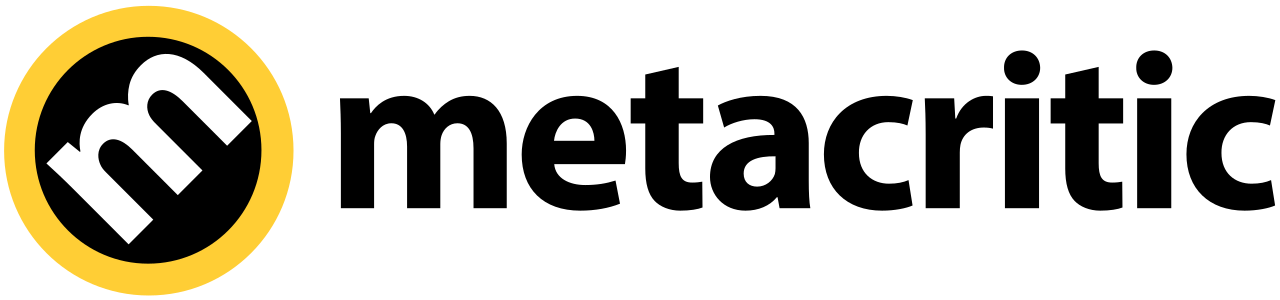

#Introduction of the Columns in Metacritics Dataset:

The Metacritic Dataset contains **8** meaningful columns. \
*   **Title**: Name of the Game; there are 3438 unique games.
*   **Year**: year of the release
*   **Publisher**: 1238 unique game publishers
*   **Genre**: different combinations of genres; usually each game has more than one tagged genres.
*   **Platform**: 20 unique publishing platforms.
*   **Metascore**(form of rating): The average score from all Metacritic critics
*   **Avg_Userscore**: The average score of all user scores for a game/platform 
*   **No_Players**(forms and n of players): How many players can play the game

In [ ]:
meta_data['Platform'].nunique()

20

In [ ]:
# Title, Year, Publisher, Genre, Platform, Metascore(form of rating), Avg_Userscore, No_Players(forms and n of players)
meta_data

Unnamed: 0  ...             No_Players
0              0  ...               1 Player
1              1  ...                   1-2 
2              2  ...               1 Player
3              3  ...                   1-2 
4              4  ...               1 Player
...          ...  ...                    ...
4995        4995  ...  No Online Multiplayer
4996        4996  ...              4  Online
4997        4997  ...               1 Player
4998        4998  ...          not specified
4999        4999  ...     Online Multiplayer

[5000 rows x 9 columns]

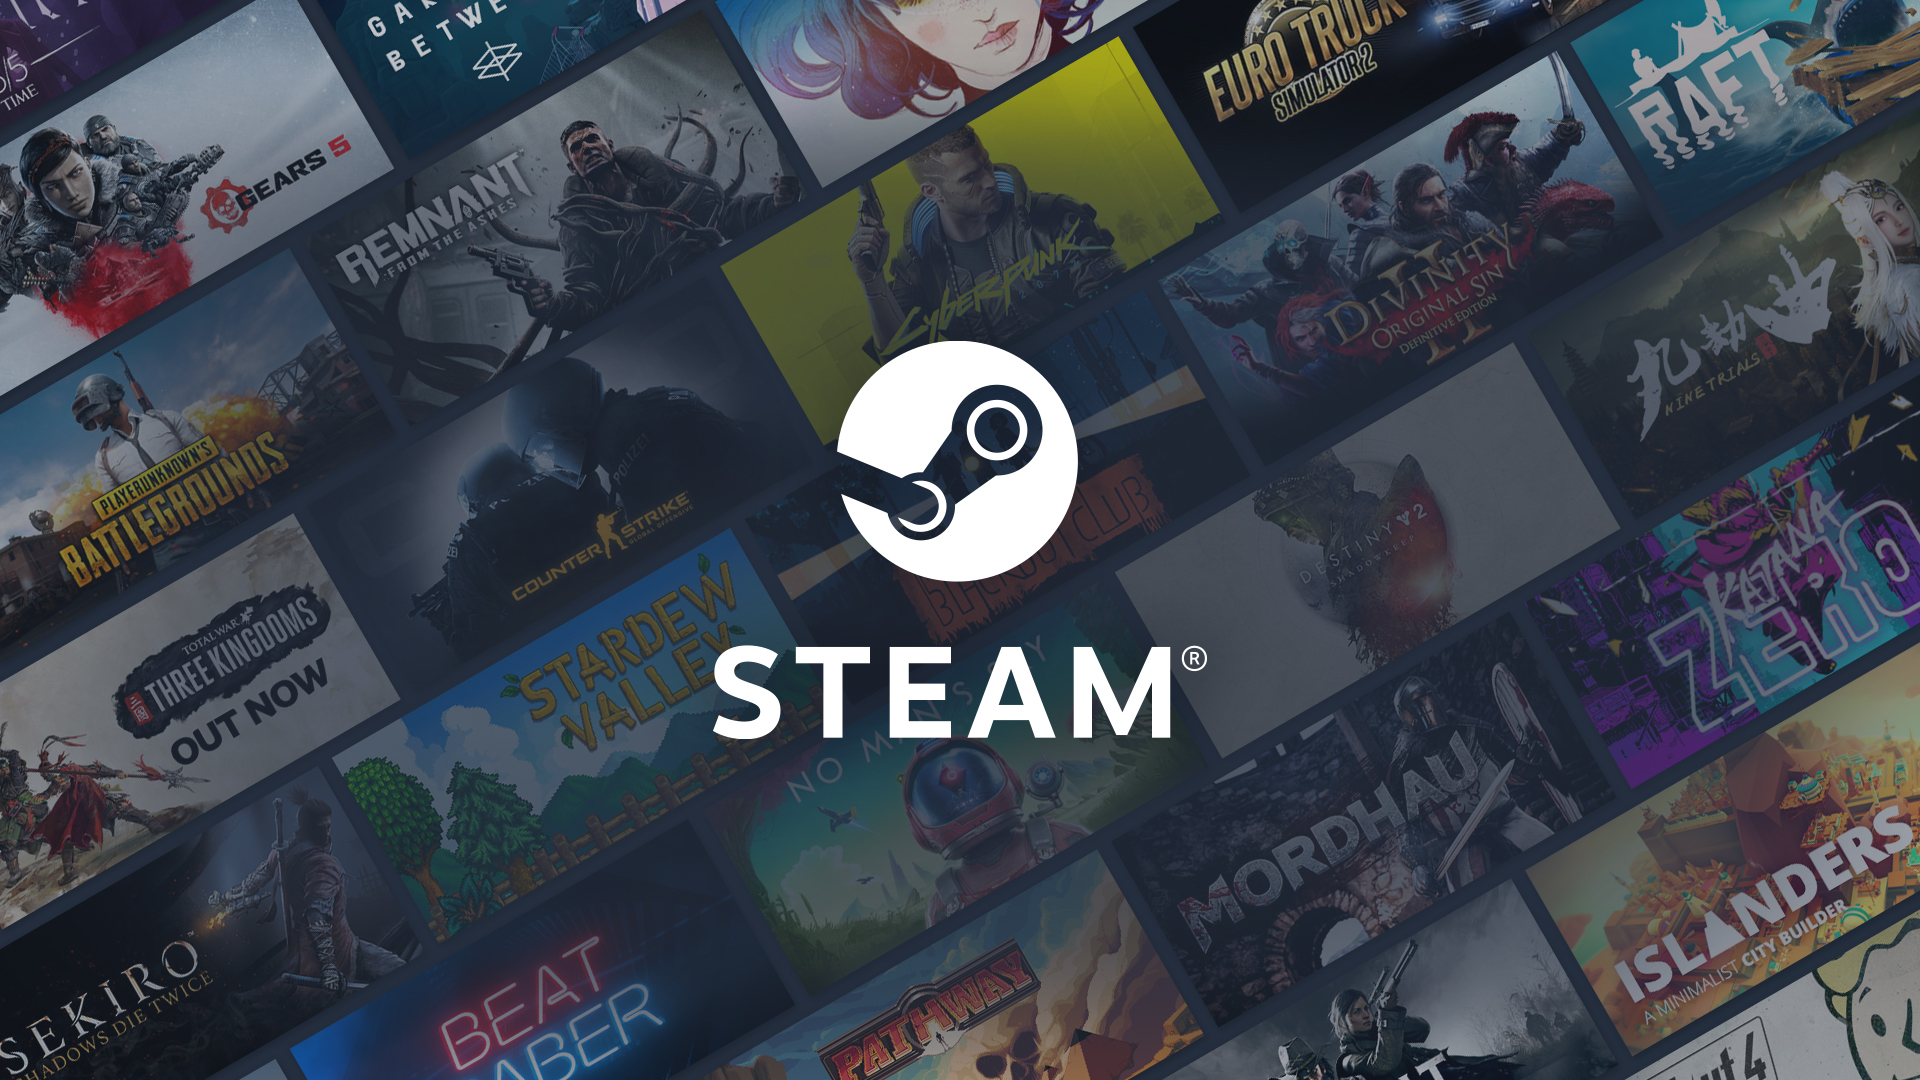

# Introduction of the Columns in the Steam Dataset:
\

The Metacritic Dataset contains **8** meaningful columns. \
1. Basic Info of Creator and Releasor
*   **name**: Name of the Game; there are 3438 unique games.
*   **release_date**: in format YYYY-MM-DD
*   **publisher**: 1238 unique game publishers
*   **platforms**: 20 unique publishing platforms.
*   **english**:1 if is in English\


2.  Game Categories
*   **categories**: The average score of all user scores for a game/platform 
*   **genres**: different combinations of genres; usually each game has more than one tagged genres. action/casual..
*   **steamspy_tag**(forms and n of players): How many players can play the game\

3. Gamer side variables
*   **achievements**：Number of in-games achievements,ranging from 0-9821
*   **owner**：Estimated number of owners. Contains lower and upper bound.
*   **price**(form of rating): The average score from all Metacritic critics\


4.  Variables of popularity
*   **positive_ratings**：Number of positive ratings, from SteamSpy
*   **negative_ratings**：Number of negative ratings, from SteamSpy
*   **average_playtime**：Average user playtime, from SteamSpy
*   **median_playtime**： Median user playtime, from SteamSpy



In [ ]:
steam_data 
# appid; name; release_date; english or not; required_age; 
# developer; publisher; platforms; price
# 3 cat cols: categories(forms of game & n of playes); genres(action/casual..); steamspy_tag(n of players; First person or third person..;);
# achievements; owner;
# positive_ratings, negative_ratings; average_playtime; median_playtime; 


appid                        name  ...             owners  price
0           10              Counter-Strike  ...  10000000-20000000   7.19
1           20       Team Fortress Classic  ...   5000000-10000000   3.99
2           30               Day of Defeat  ...   5000000-10000000   3.99
3           40          Deathmatch Classic  ...   5000000-10000000   3.99
4           50   Half-Life: Opposing Force  ...   5000000-10000000   3.99
...        ...                         ...  ...                ...    ...
27070  1065230             Room of Pandora  ...            0-20000   2.09
27071  1065570                   Cyber Gun  ...            0-20000   1.69
27072  1065650            Super Star Blast  ...            0-20000   3.99
27073  1066700  New Yankee 7: Deer Hunters  ...            0-20000   5.19
27074  1069460                   Rune Lord  ...            0-20000   5.19

[27075 rows x 18 columns]

# EDA 

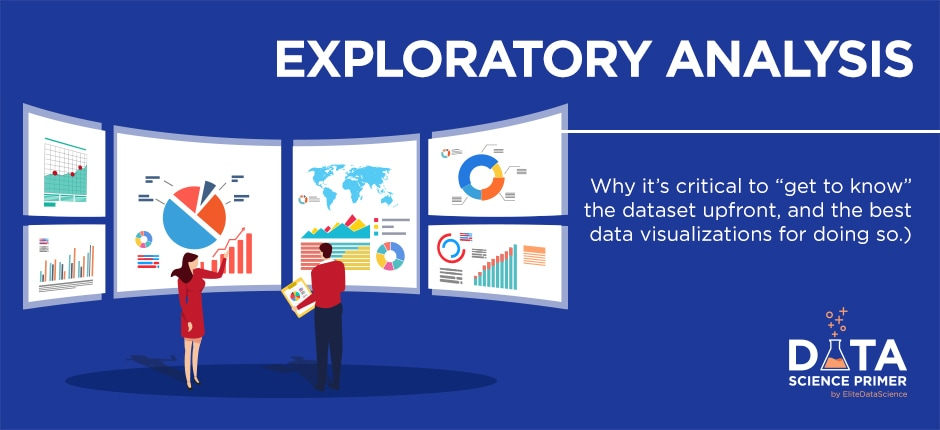

## Preprocessing steam_data, steam_des, mata_data and meta_comment

In [ ]:
# Preprocessing steam_data
# Drop null values and games without positive or negative ratings
df = steam_data.loc[(steam_data['positive_ratings']!=0) & (steam_data['negative_ratings']!=0)].dropna()
# Take positive_ratings/negative ratings as ratio
df['ratio'] = df['positive_ratings']/df['negative_ratings']
# Take midpoint of the range of owners as sales
df[['min','max']] = df['owners'].str.split('-', 1, expand=True)
df['min'] = pd.to_numeric(df['min'], errors='coerce')
df['max'] = pd.to_numeric(df['max'], errors='coerce')
df['sales'] = (df['min']+df['max'])/2
# Get revenue from sales and price for each game
df['revenue'] = df['sales']*df['price']
# Get year and month from release_date
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'], df['month'] = df['release_date'].dt.year, df['release_date'].dt.month

In [ ]:
# Preprocessing steam_des
steam_des.dropna(inplace=True)

In [ ]:
# Preprocessing meta_data

# Data Type
meta_data['Avg_Userscore'] = pd.to_numeric(meta_data['Avg_Userscore'], errors='coerce')
meta_data['Metascore'] = pd.to_numeric(meta_data['Metascore'], errors='coerce')

# NA
# 1) Fill numeric na wtih mean
meta_data.isnull().sum().sum() # there are 2585 nas in total
# 2585/50000 = 0.0517 only 5% are null acroeess dataset, fillna would not skew much.
meta_data[['Metascore','Avg_Userscore']].fillna(meta_data[['Metascore','Avg_Userscore']].mean(), inplace = True)
# no more nas in the two numeric cols
meta_data['Metascore'].isna().sum() 
meta_data['Avg_Userscore'].isna().sum()

# 2) Drop non numeric na
meta_data.info() # still 5000 entries
meta_data.dropna(inplace = True)
meta_data.info() # now 3706 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5000 non-null   int64  
 1   Title          5000 non-null   object 
 2   Year           5000 non-null   object 
 3   Publisher      5000 non-null   object 
 4   Genre          5000 non-null   object 
 5   Platform       5000 non-null   object 
 6   Metascore      4989 non-null   float64
 7   Avg_Userscore  4913 non-null   float64
 8   No_Players     4993 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 351.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4906 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4906 non-null   int64  
 1   Title          4906 non-null   object 
 2   Year           4906 non-null   object 
 3   Publisher      

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
# Preprocessing meta_comment

# Drop all string NAs
meta_comment.isna().sum() # Comment col has 23 nas; Username col 3 nas.
23/len(meta_comment) # result < 0.001, so drop na
meta_comment.dropna(inplace = True)
meta_comment.isna().sum() # meta_comment has no NA now 

Unnamed: 0    0
Title         0
Platform      0
Userscore     0
Comment       0
Username      0
dtype: int64

## Steam EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23502 entries, 0 to 27071
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             23502 non-null  int64         
 1   name              23502 non-null  object        
 2   release_date      23502 non-null  datetime64[ns]
 3   english           23502 non-null  int64         
 4   developer         23502 non-null  object        
 5   publisher         23502 non-null  object        
 6   platforms         23502 non-null  object        
 7   required_age      23502 non-null  int64         
 8   categories        23502 non-null  object        
 9   genres            23502 non-null  object        
 10  steamspy_tags     23502 non-null  object        
 11  achievements      23502 non-null  int64         
 12  positive_ratings  23502 non-null  int64         
 13  negative_ratings  23502 non-null  int64         
 14  average_playtime  2350

### Top Games

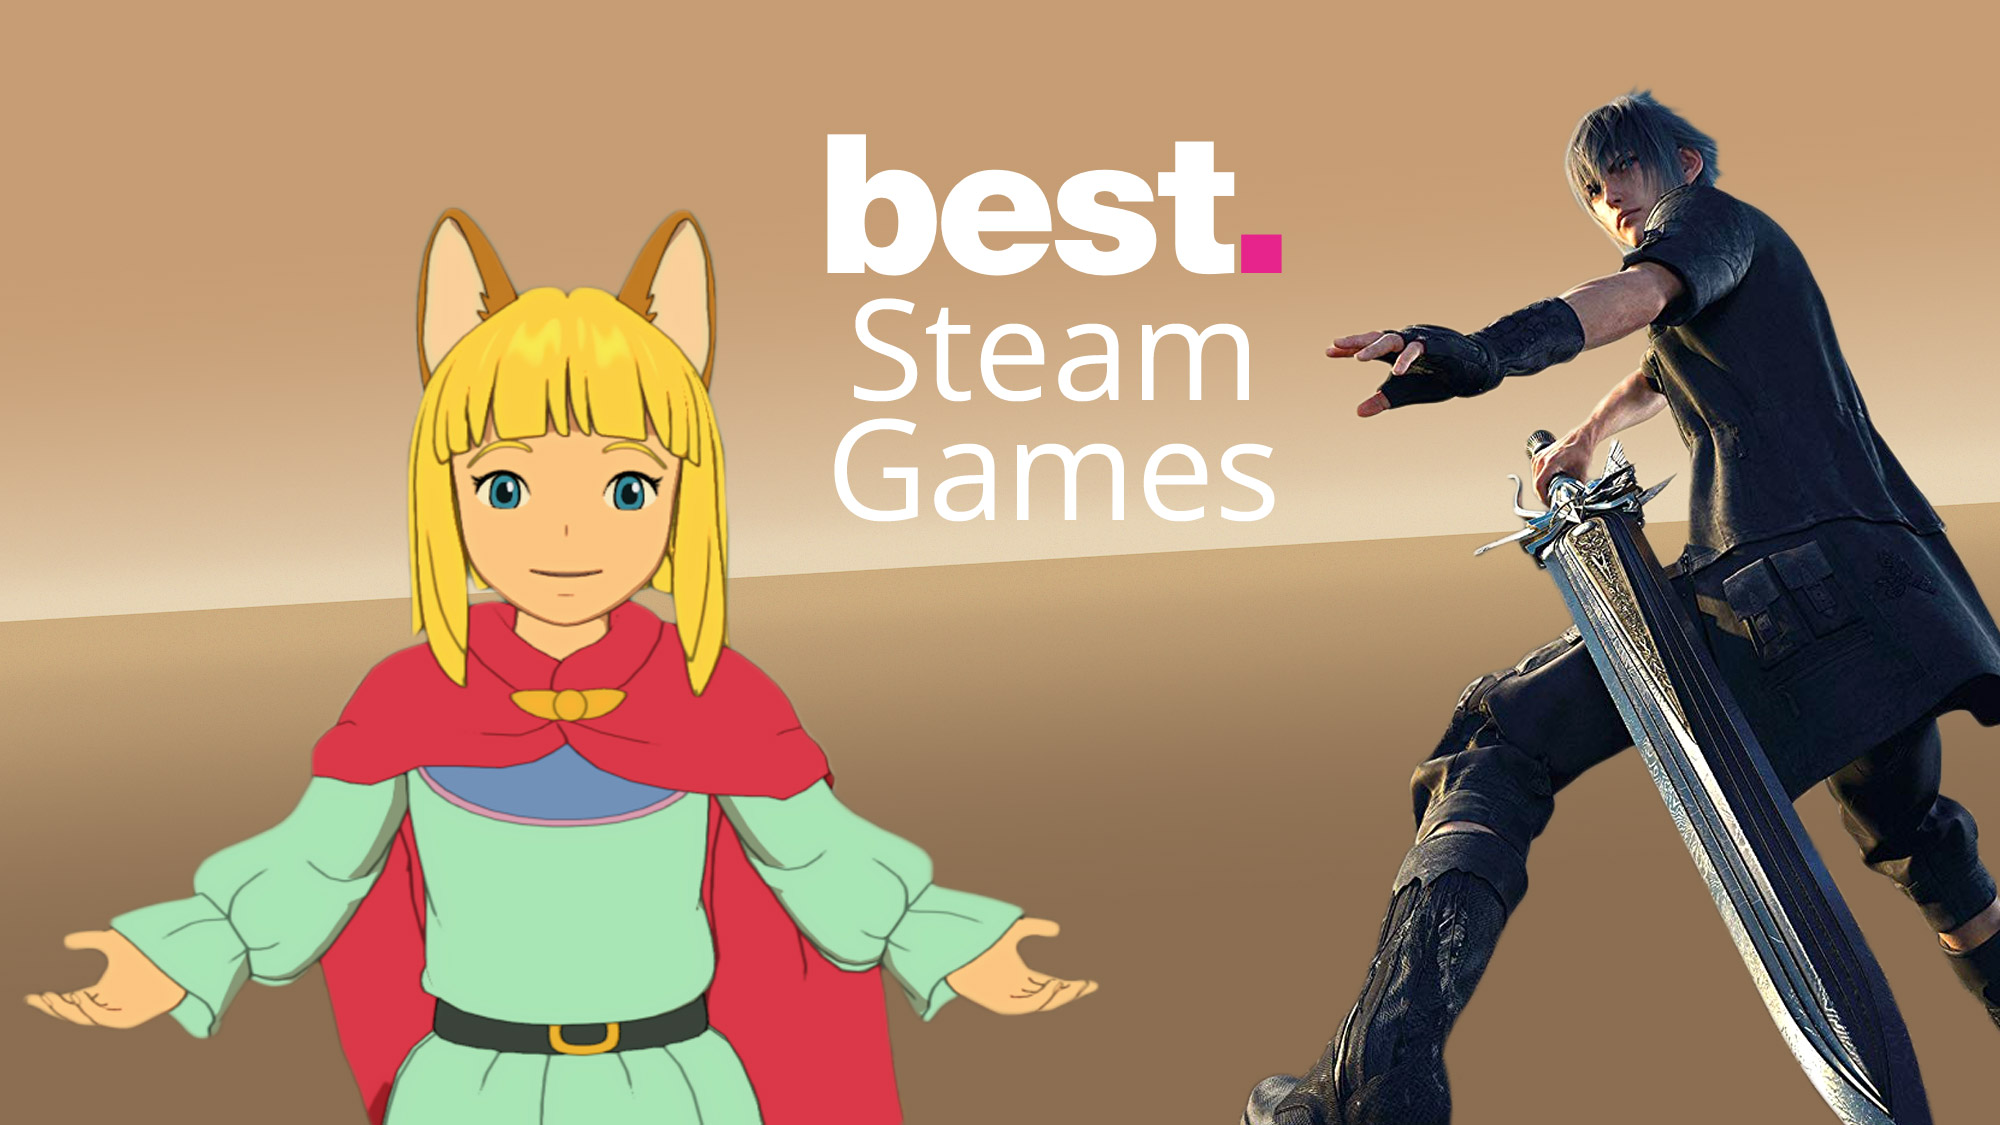

**Top 15 best-selling games by sales** 

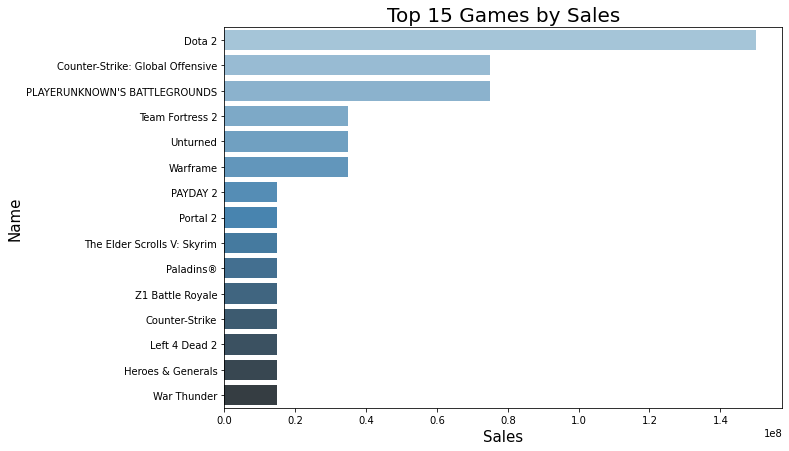

In [ ]:
# top 15 best-selling games by sales 
top_15_sales = df[['name','sales']].sort_values(['sales'], ascending = False).head(15)

plt.figure(figsize =(10, 7))
ax = sns.barplot(x="sales", y="name", data=top_15_sales, palette='Blues_d')

plt.title('Top 15 Games by Sales', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.show()

**Top 15 best-selling games by revenue**

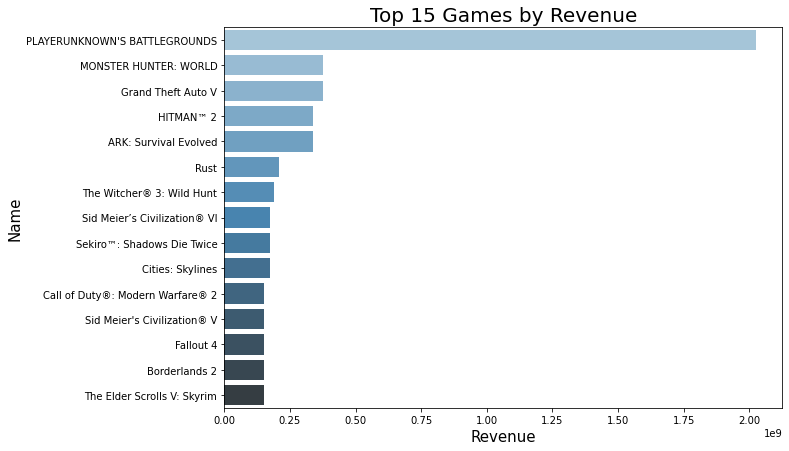

In [ ]:
# top 15 best-selling games by revenue 
top_15_games_by_revenue = df[['name','revenue']].sort_values(['revenue'], ascending = False).head(15)

plt.figure(figsize =(10, 7))
ax = sns.barplot(x="revenue", y="name", data=top_15_games_by_revenue, palette='Blues_d')

plt.title('Top 15 Games by Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.show()

**Top 15 highly-rated games**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32058 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_

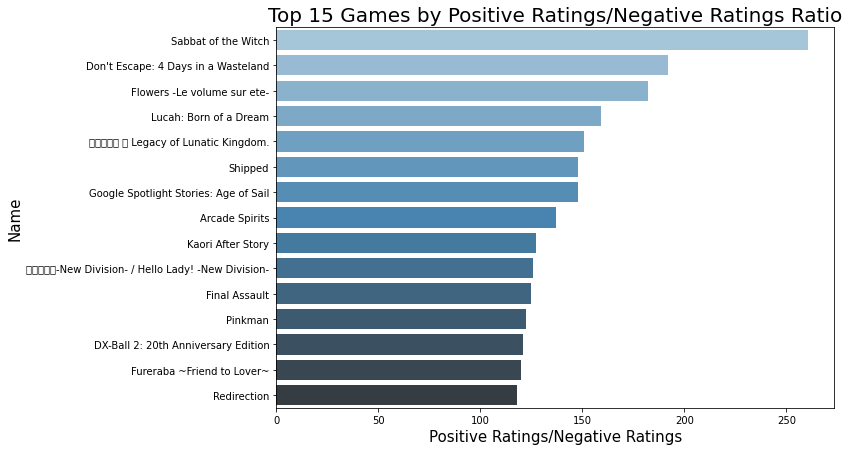

In [ ]:
# top 15 highly-rated games
top_15_ratings = df[['appid','name','ratio']].sort_values(['ratio'], ascending = False).head(15)

plt.figure(figsize =(10, 7))
ax = sns.barplot(x="ratio", y="name", data=top_15_ratings, palette='Blues_d')

plt.title('Top 15 Games by Positive Ratings/Negative Ratings Ratio', fontsize=20)
plt.xlabel('Positive Ratings/Negative Ratings', fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.show()

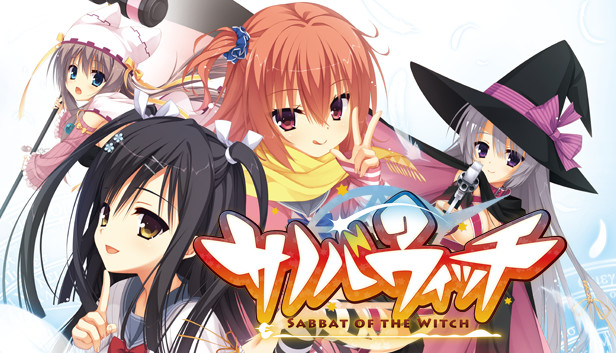

**Top 15 games by median play time** 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25042 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20185 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25042 missing from current font.
  font.set_

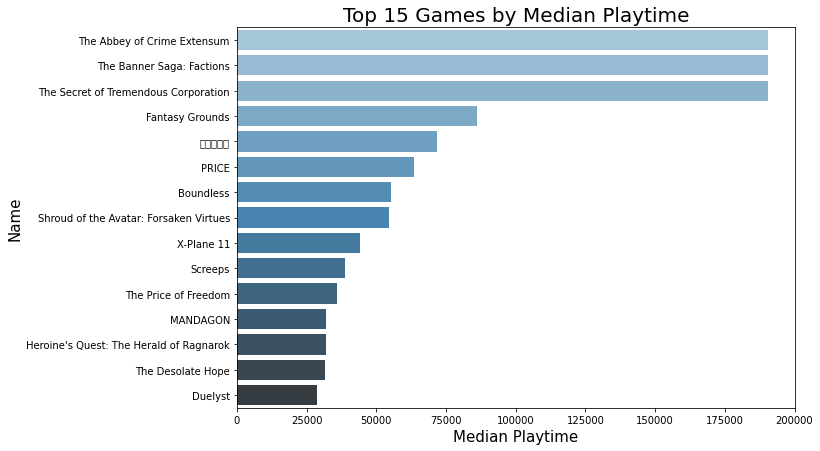

In [ ]:
# top 15 games by median play time 
top_15_games_by_playtime = df[['name','median_playtime']].sort_values(['median_playtime'], ascending = False).head(15)

plt.figure(figsize =(10, 7))
ax = sns.barplot(x="median_playtime", y="name", data=top_15_games_by_playtime, palette='Blues_d')

plt.title('Top 15 Games by Median Playtime', fontsize=20)
plt.xlabel('Median Playtime', fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.show()

### Top Publishers

**Top 15 Best-Selling Publishers by Sales**

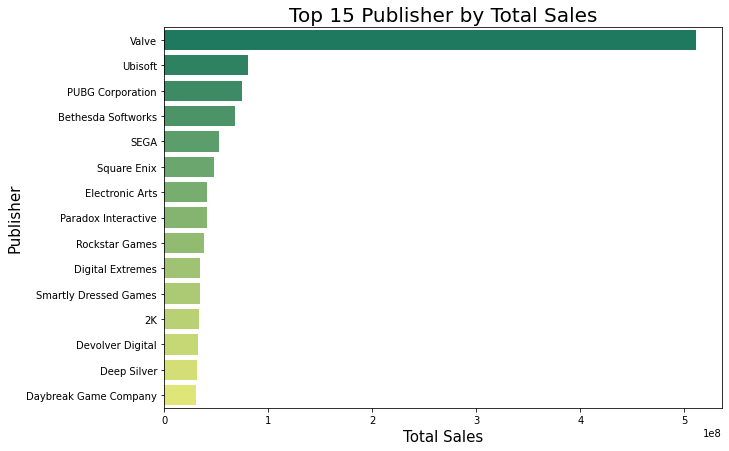

In [ ]:
# Top 15 Best-Selling Publishers by Sales
top_15_publishers_s = df[['publisher','sales']].groupby('publisher',as_index=False).sum().sort_values(['sales'], ascending = False).head(15)

plt.figure(figsize =(10, 7))
ax = sns.barplot(x="sales", y="publisher", data=top_15_publishers_s, palette='summer')

plt.title('Top 15 Publisher by Total Sales', fontsize=20)
plt.xlabel('Total Sales', fontsize=15)
plt.ylabel('Publisher', fontsize=15)
plt.show()

**Top 15 Best-Selling Publishers by Revenue**

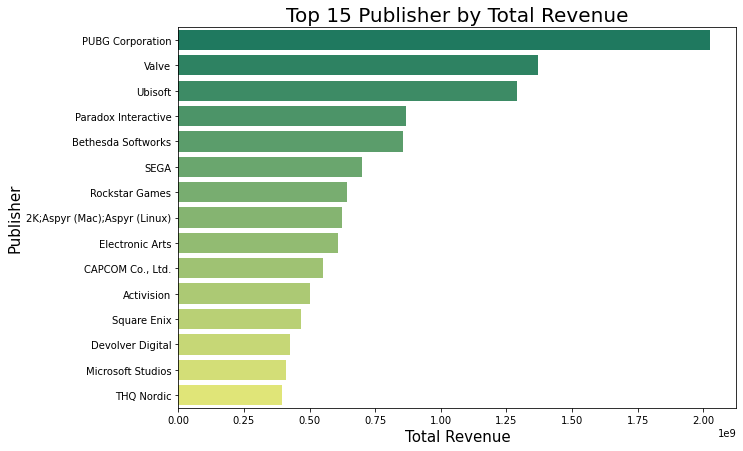

In [ ]:
# Top 15 Best-Selling Publishers by Revenue
top_15_publishers_r = df[['publisher','revenue']].groupby('publisher',as_index=False).sum().sort_values(['revenue'], ascending = False).head(15)

plt.figure(figsize =(10, 7))
ax = sns.barplot(x="revenue", y="publisher", data=top_15_publishers_r, palette='summer')

plt.title('Top 15 Publisher by Total Revenue', fontsize=20)
plt.xlabel('Total Revenue', fontsize=15)
plt.ylabel('Publisher', fontsize=15)
plt.show()

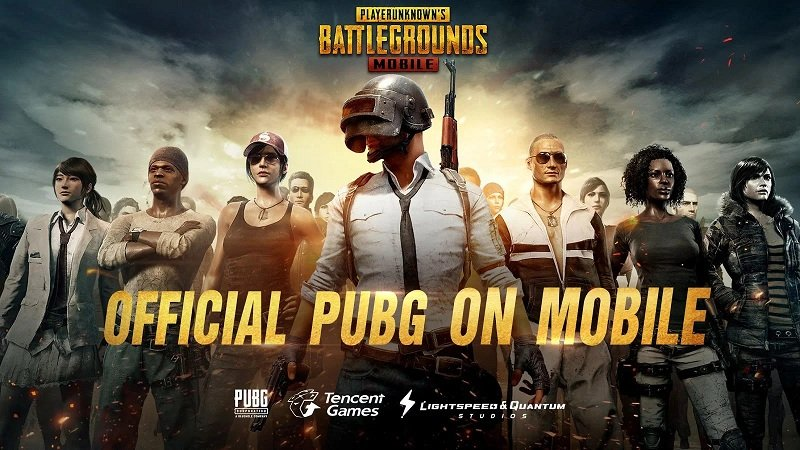

### Trends

**Number of Games Published by Year**

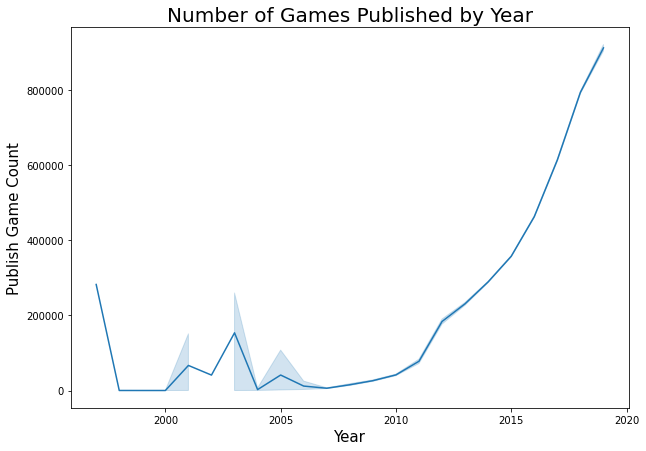

In [ ]:
# Number of Games Published by Year
trend = df[['year','appid']].groupby('year', as_index=False).count()
plt.figure(figsize =(10, 7))
ax = sns.lineplot(data=df, x="year", y="appid")
plt.title('Number of Games Published by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Publish Game Count', fontsize=15)
plt.show()

However, we soon see an exponential growth of video games business since 2010 with an accelerating speed. The number of published games reached an all-time high in year 2020.

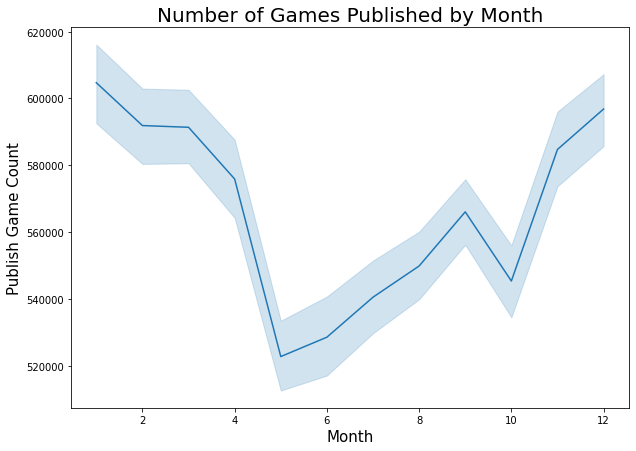

In [ ]:
# Number of Games Published by Month
trend = df[['month','appid']].groupby('month', as_index=False).count()
plt.figure(figsize =(10, 7))
ax = sns.lineplot(data=df, x="month", y="appid")
plt.title('Number of Games Published by Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Publish Game Count', fontsize=15)
plt.show()

### Top Genres

In [ ]:
# Split genres column
s = df['genres'].str.split(';').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
genres_df = df.join(s)
del genres_df['genres']

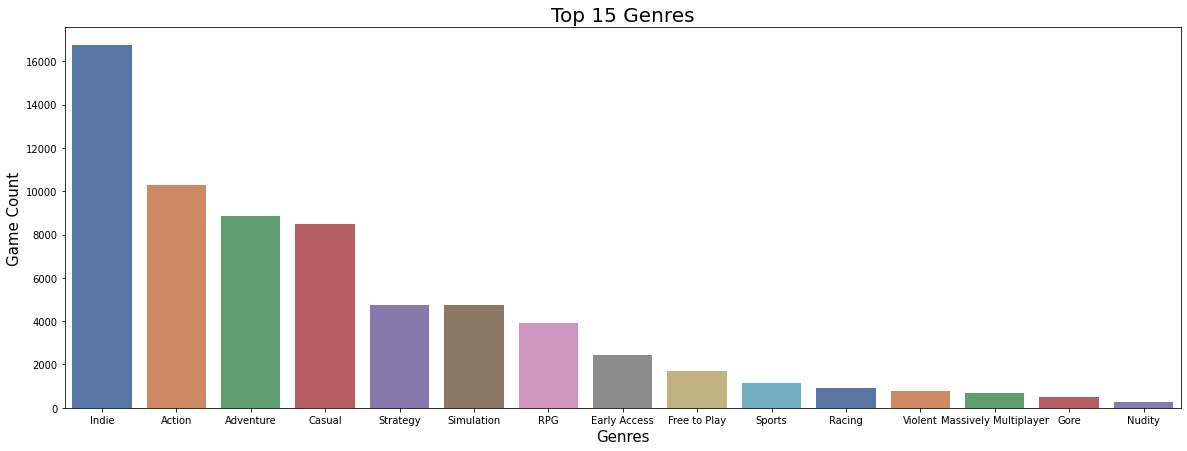

In [ ]:
top_15_genres = genres_df[['appid','genre']].groupby('genre', as_index = False).count().sort_values('appid',ascending=False).head(15)
plt.figure(figsize =(20, 7))
ax = sns.barplot(x="genre", y="appid", data=top_15_genres, palette='deep')

plt.title('Top 15 Genres', fontsize=20)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Game Count', fontsize=15)
plt.show()

### Top Categories

In [ ]:
# Split categories column
c = df['categories'].str.split(';').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)
c.name = 'category'
categories_df = df.join(c)
del categories_df['categories']

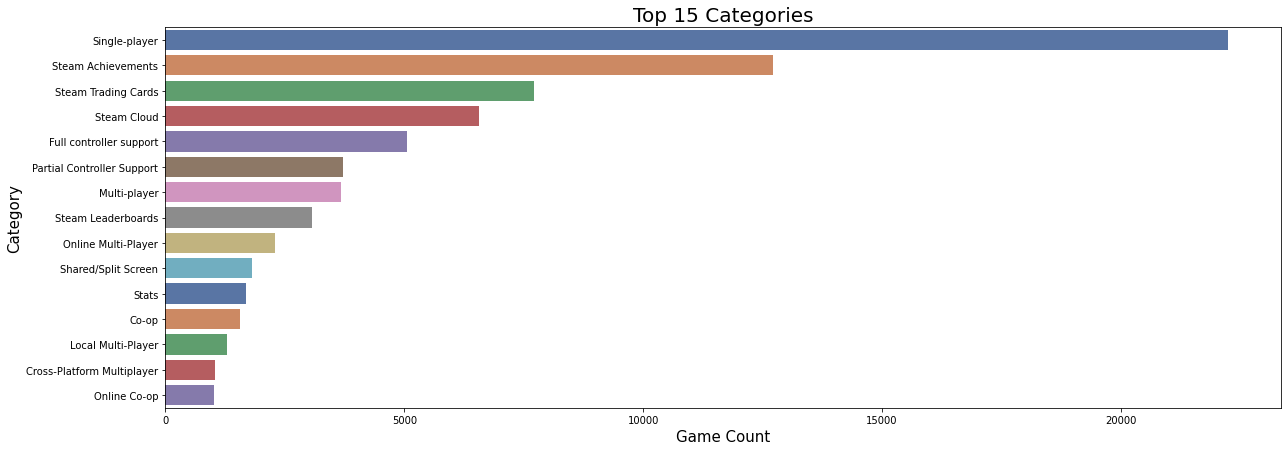

In [ ]:
top_15_categories = categories_df[['appid','category']].groupby('category', as_index = False).count().sort_values('appid',ascending=False).head(15)
plt.figure(figsize =(20, 7))
ax = sns.barplot(x="appid", y="category", data=top_15_categories, palette='deep')

plt.title('Top 15 Categories', fontsize=20)
plt.xlabel('Game Count', fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.show()

### Other Variables Description

In [ ]:
df['achievements'].describe()
# The number of in-game achievements, if any

count    23502.000000
mean        49.983406
std        375.010703
min          0.000000
25%          0.000000
50%          8.000000
75%         25.000000
max       9821.000000
Name: achievements, dtype: float64

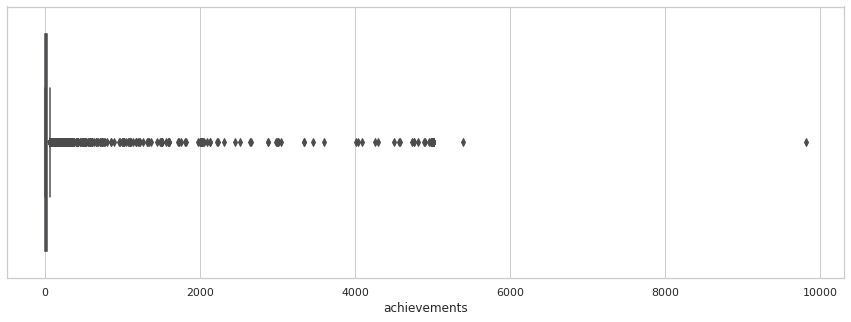

In [ ]:
# Boxplot of achievements
# 75% of the values are between 0 and 25
# However, some games have achievements range from 75 to 10000
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["achievements"])

In [ ]:
df['median_playtime'].describe()
# Median user playtime, from SteamSpy

count     23502.000000
mean        168.097439
std        2525.750274
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max      190625.000000
Name: median_playtime, dtype: float64

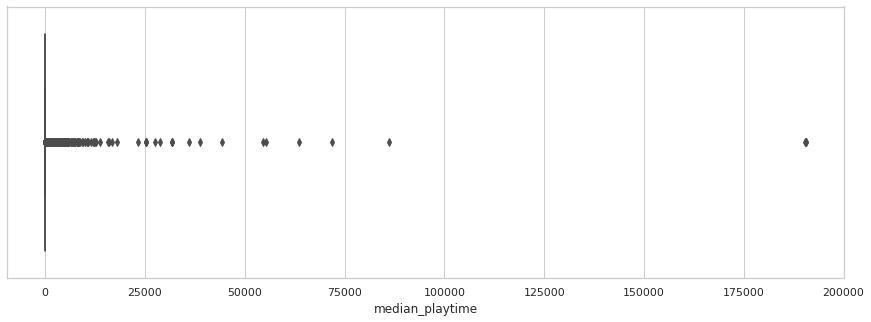

In [ ]:
# Boxplot of median playtime
# 75% of the value are between 0 and 3
# However, some games have median playtime range from 3 to 200000
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["median_playtime"])

In [ ]:
df['price'].describe()
#Current full price of title in GBP, (pounds sterling)

count    23502.000000
mean         6.238436
std          7.354120
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        154.990000
Name: price, dtype: float64

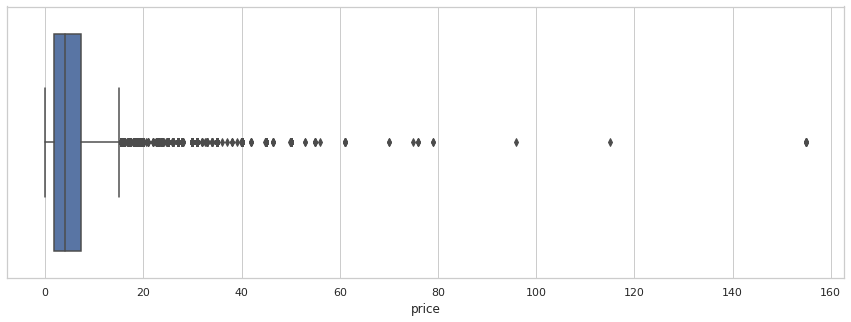

In [ ]:
# Boxplot of price
# 75% of the value are between 0 and 7.19
# However, some games have prices range from 10 to 160
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["price"])

In [ ]:
df['english'].value_counts()
# Language support: 1 if is in English

1    23073
0      429
Name: english, dtype: int64

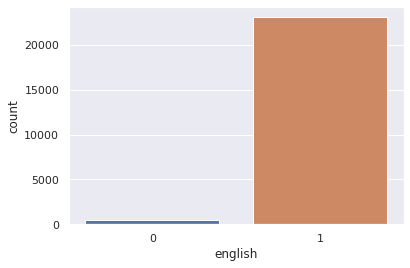

In [ ]:
# Countplot of english
# Most of the games support english
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="english", data=df)

In [ ]:
df['required_age'].value_counts()
# Minimum required age according to PEGI UK standards. Many with 0 are unrated or unsupplied.

0     22932
18      296
16      188
12       66
7        10
3        10
Name: required_age, dtype: int64

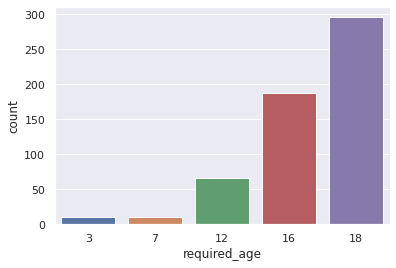

In [ ]:
# Countplot of minimum required age excluding 0 because they are unrated or unsupplied.
# Most games have minimum required age 18
sns.set_theme(style="darkgrid")
min_age = df[['required_age']][df['required_age']!=0]
ax = sns.countplot(x="required_age", data=min_age)

### Correlation Matrix

From the correlation below, we can see that negative rating, positive ratings and median play time are highly correlated with our Y label. This is not surprising. Others are slightly less correlated. But this is not a reason to exclude those less correlated ones from our model.

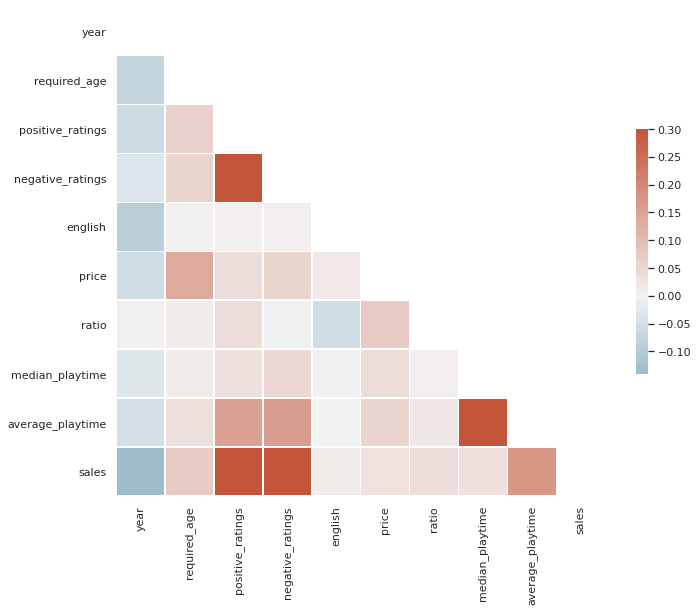

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df[['year','required_age','positive_ratings', 'negative_ratings', 'english',
           'price', 'ratio', 'median_playtime','average_playtime','sales']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Steam & Metacritic Join EDA

Conduct Three Merges:
1. Merge the **df** and **steam_des** to include gaming descriptions -> *steam_df*
2. Merge the **meta_data** and **meta_comment** to include meta comments -> *meta_data*
3. Merge(left) the **steam_df** with **meta_data** to add two ratings variables, \
only keeping those in steam: metacrtic scores and average user score -> *steam_meta*

In [ ]:
# df and meta_data have different format
# make them all in title form, with first character in words capitalized and others not
df['name'] = df['name'].apply(lambda row: row.title())
meta_data['Title'] = meta_data['Title'].apply(lambda row: row.title())

In [ ]:
# Conduct three merges
# 1. Merge the steam_data and steam_des to include comments
steam_df = df.merge(steam_des, how = 'left', left_on = 'appid', right_on = 'steam_appid')

In [ ]:
# 2. merge the count of comment per game on Metacritic to meta_data

# calculate count of comment per game
meta_comm_count = meta_comment.groupby('Title').count().reset_index(inplace=False)
meta_comm_count = meta_comm_count[['Title','Comment']].copy()
meta_comm_count.rename(index=str, columns={'Title':'name','Comment':'count_of_comments'}, inplace=True)

meta_comm_count['name'].nunique()
# only 2325 games among 5000 games in metacritic data has comments. Not more than half

# merge meta data with meta comment count
meta_data.rename(columns={'Title':'name'}, inplace=True)
meta_data = meta_data.merge(meta_comm_count, on = 'name', how = 'left')

In [ ]:
meta_data.columns

Index(['Unnamed: 0', 'name', 'Year', 'Publisher', 'Genre', 'Platform',
       'Metascore', 'Avg_Userscore', 'No_Players', 'count_of_comments'],
      dtype='object')

In [ ]:
steam_df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'ratio',
       'min', 'max', 'sales', 'revenue', 'year', 'month', 'steam_appid',
       'detailed_description', 'about_the_game', 'short_description'],
      dtype='object')

In [ ]:
# 3. Merge meta_data with steam_df - INNER JOIN keeping games in both dataframe 

# n-gram similarity join

tok = sm.tokenizer.qgram_tokenizer.QgramTokenizer(
    qval= 5, # 5 grams
    return_set= True)

output_pairs = ssj.jaccard_join(steam_df.reset_index(), # force index to become a field in the df
                                meta_data.reset_index(), 
                                'index', 'index', 'name', 'name', # left_on # right_on
                                tok , 
                                0.8, # return matches that ranks above 0.8, 
                                     # 0 being not similar at all and 1 being perfect match)
                                l_out_attrs= ['name'],
                                r_out_attrs= ['name']) 

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [ ]:
# in general, the right dataframe(meta_data) is cleaner - we will keep its name
output_pairs.sort_values('_sim_score').head(50)

_id  ...  _sim_score
921    921  ...    0.800000
41      41  ...    0.800000
59      59  ...    0.804348
1172  1172  ...    0.804348
1131  1131  ...    0.808511
671    671  ...    0.808511
310    310  ...    0.812500
1148  1148  ...    0.812500
222    222  ...    0.812500
110    110  ...    0.812500
126    126  ...    0.812500
948    948  ...    0.812500
655    655  ...    0.812500
193    193  ...    0.812500
1041  1041  ...    0.812500
28      28  ...    0.812500
433    433  ...    0.812500
957    957  ...    0.816327
953    953  ...    0.816327
1039  1039  ...    0.816327
859    859  ...    0.822581
842    842  ...    0.823529
510    510  ...    0.823529
754    754  ...    0.823529
313    313  ...    0.825000
154    154  ...    0.833333
137    137  ...    0.833333
864    864  ...    0.838710
346    346  ...    0.840000
800    800  ...    0.840000
776    776  ...    0.842105
694    694  ...    0.851852
157    157  ...    0.863636
318    318  ...    0.865672
218    218  ...    0.865672
259    259  ...    0.865672
437    437  ...    0.865672
467    467  ...    0.865672
836    836  ...    1.000000
820    820  ...    1.000000
783    783  ...    1.000000
821    821  ...    1.000000
822    822  ...    1.000000
823    823  ...    1.000000
819    819  ...    1.000000
835    835  ...    1.000000
831    831  ...    1.000000
834    834  ...    1.000000
825    825  ...    1.000000
833    833  ...    1.000000

[50 rows x 6 columns]

In [ ]:
steam_df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'ratio',
       'min', 'max', 'sales', 'revenue', 'year', 'month', 'steam_appid',
       'detailed_description', 'about_the_game', 'short_description'],
      dtype='object')

In [ ]:
# Output the joined dataframe btw steam_df and meta_data

tok = sm.tokenizer.qgram_tokenizer.QgramTokenizer(
    qval= 5, # 5 grams
    return_set= True)

steam_meta = ssj.jaccard_join(steam_df.reset_index(), # force index to become a field in the df
                                meta_data.reset_index(), 
                                'index', 'index', 'name', 'name', # left_on # right_on
                                tok , 
                                0.8, # return matches that ranks above 0.8, 
                                     # 0 being not similar at all and 1 being perfect match)
                                l_out_attrs= ['release_date', 'english', # Use the name of right dataframe(meta_Data) becaz it is cleaner.
                                              # Drop the steam_df 'name'column
                                              'developer', 'publisher','platforms',
                                              'required_age', 'categories', 'genres', 
                                              'steamspy_tags','achievements', 
                                              'positive_ratings', 'negative_ratings','average_playtime', 
                                              'median_playtime', 'owners', 'price', 'ratio',
                                              'min', 'max', 'sales', 'revenue', 'year', 'month', 
                                              'steam_appid','detailed_description', 
                                              'about_the_game', 'short_description'],
                                r_out_attrs= ['name','Genre', 'Platform','Metascore', 
                                              'Avg_Userscore', 'No_Players', 'count_of_comments'],
                                l_out_prefix='', 
                                r_out_prefix='')
steam_meta

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


_id  index  index  ...             No_Players  count_of_comments _sim_score
0        0    297      2  ...               1 Player                NaN        1.0
1        1    297      4  ...               1 Player                NaN        1.0
2        2   2463      7  ...              Up to 30              3562.0        1.0
3        3   2463      8  ...              Up to 16              3562.0        1.0
4        4   2463      9  ...              Up to 16              3562.0        1.0
...    ...    ...    ...  ...                    ...                ...        ...
1221  1221   1705   4896  ...          not specified                NaN        1.0
1222  1222   1722   4897  ...          not specified                NaN        1.0
1223  1223   7112   4899  ...          not specified                NaN        1.0
1224  1224  15845   4901  ...  No Online Multiplayer                NaN        1.0
1225  1225  12161   4905  ...     Online Multiplayer                NaN        1.0

[1226 rows x 38 columns]

**Post Merge Data Entries Review**
*   steam_df(steam_data + steam_desc) has **23502** entries
*   meta_data has **4906** entries.
*   steam_meta(steam_df + meta_data), it has **3301** entries(setting similarity score 0.8)

In [ ]:
# Drop and Clean
steam_meta.drop_duplicates(inplace=True)

In [ ]:
steam_meta.shape

(1226, 38)

### Top Steam Games Performance on Metacritic

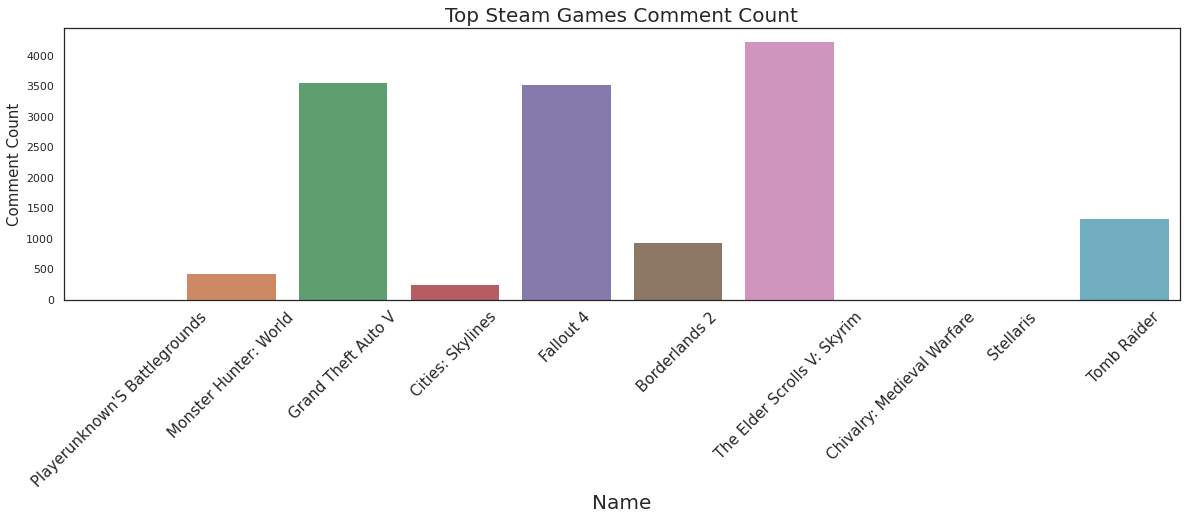

In [ ]:
# Top 15 Best-selling Steam Games Meta Comment Count
top_steam_games_meta_comment_count = steam_meta[['name','revenue','count_of_comments']].sort_values(['revenue'], ascending = False).drop_duplicates().head(10)

plt.figure(figsize =(20, 5))
ax = sns.barplot(x="name", y="count_of_comments", data=top_steam_games_meta_comment_count, palette='deep')
plt.xticks(rotation=45, fontsize = 15)
plt.title('Top Steam Games Comment Count', fontsize=20)
plt.xlabel('Name', fontsize=20)
plt.ylabel('Comment Count', fontsize=15)
plt.show()

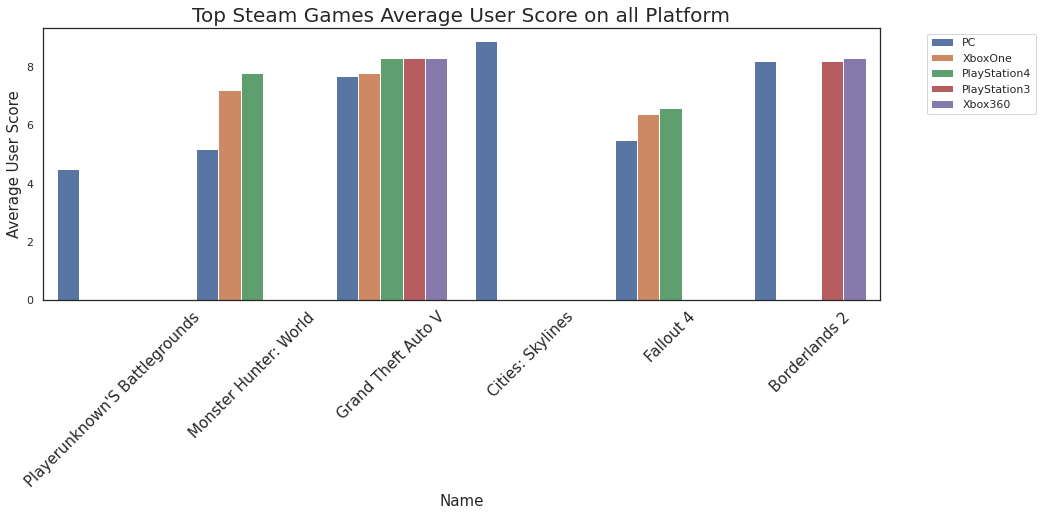

In [ ]:
# Top Steam Games average user score for all platform
top_steam_games_meta_by_revenue = steam_meta[['name','revenue','Avg_Userscore','Platform']].sort_values(['revenue'], ascending = False).head(13)
top_steam_games_user_score = top_steam_games_meta_by_revenue[['name']].drop_duplicates().merge(steam_meta,on='name')

plt.figure(figsize =(15, 5))
ax = sns.barplot(x="name", y="Avg_Userscore", hue='Platform', data=top_steam_games_user_score, palette='deep')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top Steam Games Average User Score on all Platform', fontsize=20)

plt.xticks(rotation=45, fontsize = 15)
plt.xlabel('Name', fontsize=15)
plt.ylabel('Average User Score', fontsize=15)
plt.show()

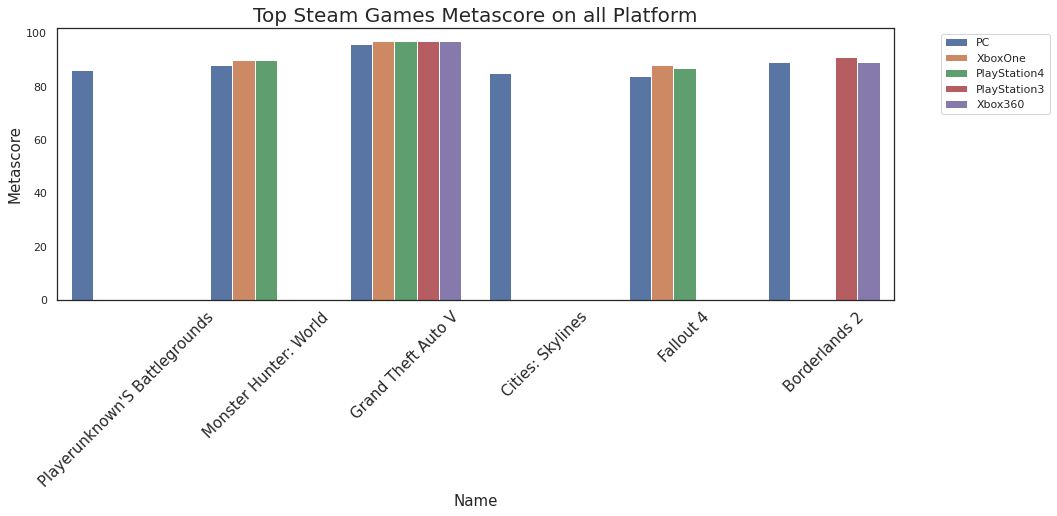

In [ ]:
# Top 15 Steam Games Meta score
top_steam_games_meta_by_revenue = steam_meta[['name','revenue','Metascore','Platform']].sort_values(['revenue'], ascending = False).head(13)
top_steam_games_meta_score = top_steam_games_meta_by_revenue[['name']].drop_duplicates().merge(steam_meta,on='name')

plt.figure(figsize =(15, 5))
ax = sns.barplot(x="name", y="Metascore", hue='Platform', data=top_steam_games_meta_score, palette='deep')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top Steam Games Metascore on all Platform', fontsize=20)
plt.xticks(rotation=45, fontsize = 15)

plt.xlabel('Name', fontsize=15)
plt.ylabel('Metascore', fontsize=15)
plt.show()

In [ ]:
# Find top 5 games by revenue with multiple platform data available
num_platform = steam_meta[['name', 'Platform', 'revenue']].groupby('name',as_index=False).agg({'Platform':'count','revenue':np.average})
top_games_platform = num_platform[num_platform['Platform']>3].sort_values('revenue',ascending=False).head(5)
top_games_platform

name  Platform      revenue
269           Grand Theft Auto V         5  374850000.0
645  The Elder Scrolls V: Skyrim         4  149850000.0
689                  Tomb Raider         4  112425000.0
168                         Doom         6   52465000.0
621                     Terraria         4   52425000.0

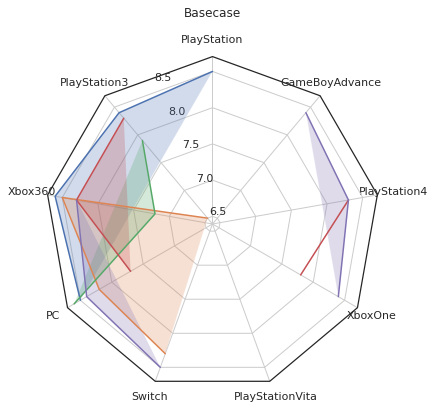

In [ ]:
# Spider Chart for Grand Theft Auto V, The Elder Scrolls V: Skyrim, Tomb Raider, Doom	and Terraria
# This chart shows how the Average User Score differs for games on different platforms

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

gta = steam_meta[['name', 'Platform', 'Avg_Userscore']].loc[steam_meta['name']=='Grand Theft Auto V'].rename(columns={'Avg_Userscore':'gta'}).drop(['name'], axis = 1)
es = steam_meta[['name', 'Platform', 'Avg_Userscore']].loc[steam_meta['name']=='The Elder Scrolls V: Skyrim'].rename(columns={'Avg_Userscore':'es'}).drop(['name'], axis = 1)
tr = steam_meta[['name', 'Platform', 'Avg_Userscore']].loc[steam_meta['name']=='Tomb Raider'].rename(columns={'Avg_Userscore':'tr'}).drop(['name'], axis = 1)
doom = steam_meta[['name', 'Platform', 'Avg_Userscore']].loc[steam_meta['name']=='Doom'].rename(columns={'Avg_Userscore':'doom'}).drop(['name'], axis = 1)
terr = steam_meta[['name', 'Platform', 'Avg_Userscore']].loc[steam_meta['name']=='Terraria'].rename(columns={'Avg_Userscore':'terr'}).drop(['name'], axis = 1)

game = tr.merge(es, how='outer', on='Platform').merge(
    terr, how='outer', on='Platform').merge(
    gta, how='outer', on='Platform').merge(
    doom, how='outer', on='Platform')
game.set_index('Platform',inplace=True)

result = game.T.to_json(orient='split')
parsed = json.loads(result)

data = [parsed['columns'],('Basecase', parsed['data'])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=8.6, bottom=6.5)

ax.set_rgrids([6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()

From the radar chart above, we could see that most games have similar average user scores across platforms. Xbox360 appears to have higher average user scores for most games.

### IP Analysis

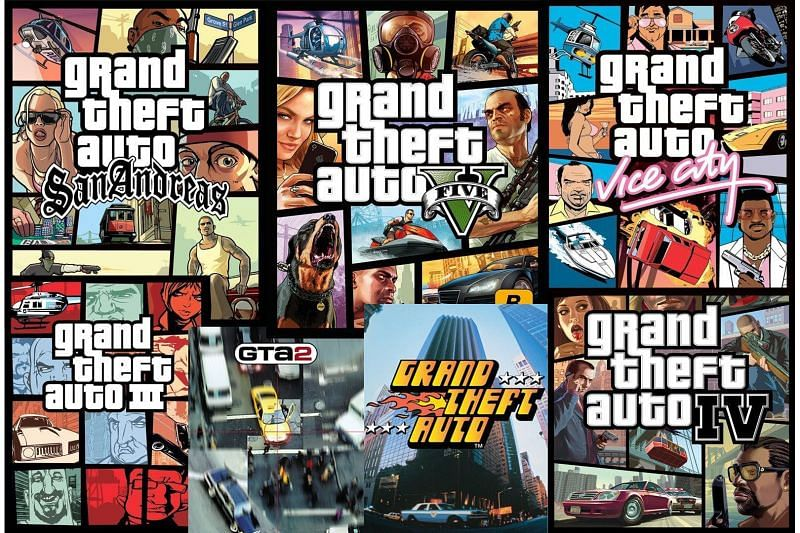

We are trying to see if top games in *meta_data* have released sequels more than those less popular games.

In [ ]:
# First we look at top 10 games by comment count on Metacritic
meta_data[['name','count_of_comments','Year']].groupby('name',as_index=False).agg({'count_of_comments':np.average,'Year':'min'}).sort_values('count_of_comments',ascending=False).head(10)

name  count_of_comments  Year
2831  The Elder Scrolls V: Skyrim             4239.0  2011
1554                Mass Effect 3             3793.0  2012
673                        Dota 2             3563.0  2013
1103           Grand Theft Auto V             3562.0  2013
851                     Fallout 4             3529.0  2015
196                 Battlefield 3             2960.0  2011
2967     The Witcher 3: Wild Hunt             2739.0  2015
2100                     Portal 2             2325.0  2011
678       Dragon Age: Inquisition             2024.0  2014
1168                  Half-Life 2             2024.0  2004

In [ ]:
# We then count how many sequels they have(in this dataset) and create a list.
pop_games = []
pop_years = []
# Cities: Skylines
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Skylines')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Skylines')]['Year'].min())
# Mass Effect
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Mass Effect')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Mass Effect')]['Year'].min())
# Dota 2 is a multiplayer online battle arena (MOBA) video game developed and published by Valve. 
# The game is a sequel to Defense of the Ancients (DotA), 
# which was a community-created mod for Blizzard Entertainment's.
# However, in this dataset, we only have data for Dota 2.
pop_games.append(len(meta_data[['name','Year']][meta_data['name'].str.contains('Dota')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Dota')]['Year'].min())
# Grand Theft Auto 
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Grand Theft Auto')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Grand Theft Auto')]['Year'].min())
# Fallout
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Fallout')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Fallout')]['Year'].min())
# Battlefield 
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Battlefield')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Battlefield')]['Year'].min())
# The Witcher
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('The Witcher')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('The Witcher')]['Year'].min())
# Portal
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Portal')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Portal')]['Year'].min())
# Half-Life
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Half-Life')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Half-Life')]['Year'].min())

# Dragon Age	
pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Dragon Age')].
                   drop_duplicates().sort_values('Year')))
pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Dragon Age')]['Year'].min())

# Create a dataframe with first release year and number of sequels for popular games
pop = pd.DataFrame({'num_sequels':pop_games,'year':pop_years}).sort_values('year')

In [ ]:
# Less popular games by comment count on Metacritic
meta_data[['name','count_of_comments','Year']].groupby('name',as_index=False).agg({'count_of_comments':np.average,'Year':'min'}).sort_values('count_of_comments').head(10)

name  count_of_comments  Year
532   Darkstalkers Resurrection                1.0  2013
2171              Quell Memento                1.0  2013
2782         Test Drive V-Rally                1.0  2000
2117  Pro Evolution Soccer 2009                1.0  2008
2038          Pinball Fantasies                1.0  2009
99      Aragami: Shadow Edition                1.0  2018
266            Bomberman Online                1.0  2001
1657        Mighty Flip Champs!                1.0  2009
1979                Pac-Man 256                1.0  2016
1924                   Obsidian                1.0  1996

In [ ]:
# We then count how many sequels they have(in this dataset) and create a list.
not_pop_games = []
not_pop_years = []
# Darkstalkers Resurrection	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Darkstalkers Resurrection')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Darkstalkers Resurrection')]['Year'].min())
# Quell Memento	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Quell Memento')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Quell Memento')]['Year'].min())

# Test Drive V-Rally	
not_pop_games.append(len(meta_data[['name','Year']][meta_data['name'].str.contains('Test Drive V-Rally')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Test Drive V-Rally')]['Year'].min())

# Pro Evolution Soccer 2009	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Evolution Soccer')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Evolution Soccer')]['Year'].min())

# Pinball Fantasies	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Pinball Fantasies')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Pinball Fantasies')]['Year'].min())

# Aragami: Shadow Edition	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Aragami: Shadow Edition')].
    drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Aragami: Shadow Edition')]['Year'].min())

# Bomberman Online	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Bomberman Online')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Bomberman Online')]['Year'].min())

# Mighty Flip Champs!	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Mighty Flip Champs')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Mighty Flip Champs')]['Year'].min())

# Pac-Man 256	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Pac-Man')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Pac-Man')]['Year'].min())

# Obsidian	
not_pop_games.append(len(meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Obsidian')].
                   drop_duplicates().sort_values('Year')))
not_pop_years.append(meta_data[['name','Year']][meta_data['name'].str.contains('Obsidian')]['Year'].min())

# Create a dataframe with first release year and number of sequels for less popular games
not_pop = pd.DataFrame({'num_sequels':not_pop_games,'year':not_pop_years}).sort_values('year')

In [ ]:
# There are two games with more than 1 sequels
# This is because those two games were released long time ago
# Pro Evolution Soccer
meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Evolution Soccer')].drop_duplicates().sort_values('Year')

name  Year      Platform
3946  Winning Eleven: Pro Evolution Soccer 2007  2007       Xbox360
1109  Winning Eleven: Pro Evolution Soccer 2007  2007  PlayStation2
3058  Winning Eleven: Pro Evolution Soccer 2007  2007           PSP
3849                  Pro Evolution Soccer 2009  2008            PC
3405                  Pro Evolution Soccer 2008  2008           PSP
2336                  Pro Evolution Soccer 2008  2008           Wii
2700                  Pro Evolution Soccer 2008  2008  PlayStation2
2721                  Pro Evolution Soccer 2010  2009           Wii
4721                  Pro Evolution Soccer 2010  2009       Xbox360
4330                  Pro Evolution Soccer 2010  2009  PlayStation3
4576                  Pro Evolution Soccer 2010  2009            PC
1702                  Pro Evolution Soccer 2009  2009           Wii
4830                  Pro Evolution Soccer 2011  2010  PlayStation3
4401                  Pro Evolution Soccer 2011  2010           Wii
4203                  Pro Evolution Soccer 2011  2010       Xbox360
3975                  Pro Evolution Soccer 2012  2011           Wii
3566                  Pro Evolution Soccer 2012  2011  PlayStation3
4541                  Pro Evolution Soccer 2012  2011       Xbox360
2605                  Pro Evolution Soccer 2013  2012  PlayStation3
2674                  Pro Evolution Soccer 2013  2012       Xbox360
3336                  Pro Evolution Soccer 2013  2012            PC
3692                  Pro Evolution Soccer 2014  2013       Xbox360
4673                  Pro Evolution Soccer 2014  2013  PlayStation3
2776                  Pro Evolution Soccer 2015  2014            PC
2495                  Pro Evolution Soccer 2015  2014  PlayStation4
4164                  Pro Evolution Soccer 2015  2014       XboxOne
992                   Pro Evolution Soccer 2016  2015  PlayStation4
1551                  Pro Evolution Soccer 2016  2015       XboxOne
991                   Pro Evolution Soccer 2017  2016       XboxOne
1474                  Pro Evolution Soccer 2017  2016  PlayStation4
2638                  Pro Evolution Soccer 2018  2017       XboxOne
2011                  Pro Evolution Soccer 2018  2017  PlayStation4
3083                  Pro Evolution Soccer 2018  2017            PC
3761                  Pro Evolution Soccer 2019  2018  PlayStation4

In [ ]:
# Pac-Man
meta_data[['name','Year','Platform']][meta_data['name'].str.contains('Pac-Man')].drop_duplicates().sort_values('Year')

name  Year        Platform
3860                   Pac-Man Collection  2001  GameBoyAdvance
4738                          Pac-Man Vs.  2003        GameCube
2216         Pac-Man Championship Edition  2007         Xbox360
114       Pac-Man Championship Edition Dx  2010         Xbox360
251       Pac-Man Championship Edition Dx  2010    PlayStation3
1080    Pac-Man Championship Edition Dx +  2013              PC
3275                          Pac-Man 256  2016         XboxOne
4131                          Pac-Man 256  2016    PlayStation4
4714       Pac-Man Championship Edition 2  2016              PC
4820       Pac-Man Championship Edition 2  2016    PlayStation4
3690  Pac-Man Championship Edition 2 Plus  2018          Switch

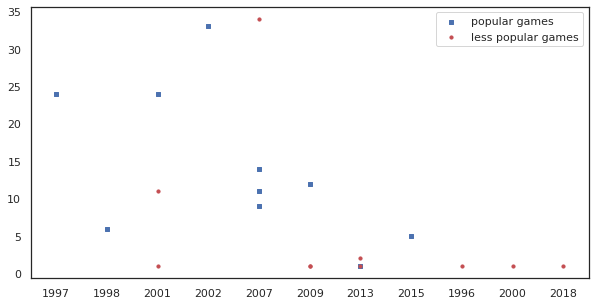

In [ ]:
# Plot sequel number of both popular and less popular games based on comment count
# We could see that games that are popular (by comment count) were first released earlier, 
# and tend to have more sequels than those less popular.
# Or popular IPs would lead to popular sequels.
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

ax1.scatter(pop['year'], pop['num_sequels'], s=10, c='b', marker="s", label='popular games')
ax1.scatter(not_pop['year'],not_pop['num_sequels'], s=10, c='r', marker="o", label='less popular games')
plt.legend(loc='upper right')
plt.show()

Next, we take a look at the metascores and average user scores for popular sequels.

In [ ]:
meta_data[['name','count_of_comments','Year']].groupby('name',as_index=False).agg({'count_of_comments':np.average,'Year':'min'}).sort_values('count_of_comments',ascending=False).head(10)

name  count_of_comments  Year
2831  The Elder Scrolls V: Skyrim             4239.0  2011
1554                Mass Effect 3             3793.0  2012
673                        Dota 2             3563.0  2013
1103           Grand Theft Auto V             3562.0  2013
851                     Fallout 4             3529.0  2015
196                 Battlefield 3             2960.0  2011
2967     The Witcher 3: Wild Hunt             2739.0  2015
2100                     Portal 2             2325.0  2011
678       Dragon Age: Inquisition             2024.0  2014
1168                  Half-Life 2             2024.0  2004

In [ ]:
# get popular series data
gta = meta_data[['name','Year','Metascore']][meta_data['name'].str.contains('Grand Theft Auto')].rename(columns={'Metascore':'GTA'}).drop_duplicates()
del gta['name']
gta['Year'] = gta['Year'].astype(int)
gta = gta.groupby('Year',as_index=False).mean()
es = meta_data[['name','Year','Metascore']][meta_data['name'].str.contains('Elder Scrolls')].rename(columns={'Metascore':'ES'}).drop_duplicates()
del es['name']
es['Year'] = es['Year'].astype(int)
es = es.groupby('Year',as_index=False).mean()
fo = meta_data[['name','Year','Metascore']][meta_data['name'].str.contains('Fallout')].rename(columns={'Metascore':'FO'}).drop_duplicates()
del fo['name']
fo['Year'] = fo['Year'].astype(int)
fo = fo.groupby('Year',as_index=False).mean()
bf = meta_data[['name','Year','Metascore']][meta_data['name'].str.contains('Battlefield')].rename(columns={'Metascore':'BF'}).drop_duplicates()
del bf['name']
bf['Year'] = bf['Year'].astype(int)
bf = bf.groupby('Year',as_index=False).mean()
series_df = gta.merge(es,how='outer',on='Year').merge(fo,how='outer',on='Year').merge(bf,how='outer',on='Year')
series_df.set_index('Year',inplace=True)

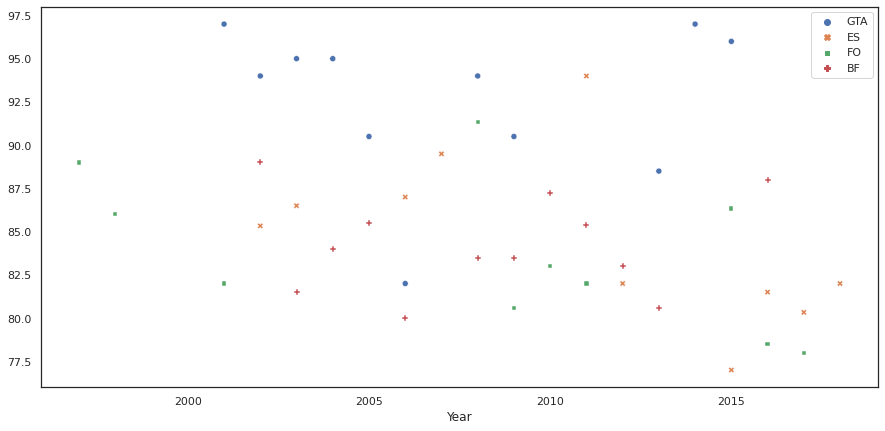

In [ ]:
# scatter plot of average metascores for popular series
plt.figure(figsize=(15,7))
sns.scatterplot(data=series_df)

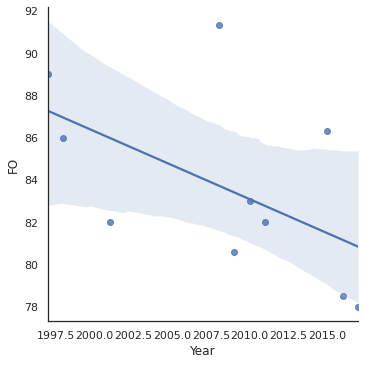

In [ ]:
# Fallout series metascore trend
sns.lmplot(x="Year", y="FO", data=fo)

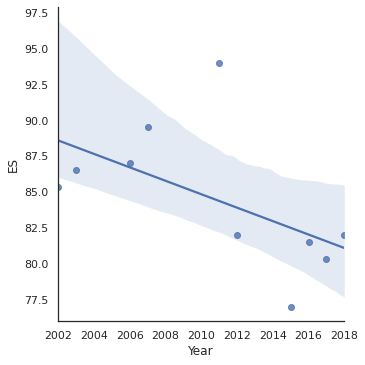

In [ ]:
# The Elder Scrolls series metascore trend
sns.lmplot(x="Year", y="ES", data=es)

Big IPs, despite their popularity, tend to get lower metascore as they keep releasing new series. This brings concerns over the benefit of the game players.

# Pre-Modeling Features Transformation

*   **Features** \

  median_playtime, price, required_age, genres, achievements, english, count_platforms, \
  gen_cat(genre category), count_categories, count_genres, owner_mid, big_publisher
*    **Label** \
ratings ratio = positive_ratings/negative_ratings

### Numerical Features

**Create a new variable big_publisher:** \

This variable is 1 if its publishing company is **either** in ..**or**


*   *top_15_publishers_r*(Revenue)
*   *top_15_publishers_s*(Sales). \

Otherwise, it is coded as 0.

In [ ]:
df.publisher.nunique() # 12244 total publishers

12244

In [ ]:
# Get the OUTER join of the two top_15_publishers
# keeping distinct publishers of both
top_publishers = top_15_publishers_r.merge(top_15_publishers_s, how = 'outer')
top_publishers = top_publishers.publisher.values.tolist()
df['big_publisher'] = ""
df['big_publisher'] = df.publisher.apply(lambda x: 1 if x in top_publishers else 0)
df['big_publisher'].value_counts()

0    22715
1      787
Name: big_publisher, dtype: int64

**Calculate the count of distinct genres, categories and platforms.** \
For *genres and categories*:
  *   The larger the number in count of genres and categories, the more **diverse and inclusive**
  the game is \
  because it can accomodate players of different preference in genres. 
  *   However, too much variety in
  categories and genres could render a game **mundane** without **its specialty and distinct character**. \
  *   Therefore, it is interesting to look at how the number of genres and categories would influence \
  the **popularity** of the game. \

For *platforms*: \
*   We assume that the more platforms a game is available on, the more **accessible** 
it is and therefore the higher the possibility of having a high **popularity** is.

In [ ]:
# Compute new vars: count_genres, count_platforms, count_categories

# Genre
if df['genres'].dtype == object and isinstance(df.iloc[0]['genres'], str):
  print(f'String')# Genres column is string
# split by ';' and count the number of items in genre - store into new col
df['count_genres'] = df['genres'].apply(lambda x: len(x.split(';')))

# Platform
if df['platforms'].dtype == object and isinstance(df.iloc[0]['platforms'], str):
  print(f'String') # platform is string
df['count_platforms'] = df['platforms'].apply(lambda x: len(x.split(';')))

# Categories
if df['categories'].dtype == object and isinstance(df.iloc[0]['categories'], str):
  print(f'String') # categories is string
df['count_categories'] = df['categories'].apply(lambda x: len(x.split(';')))


String
String
String


**Conduct Transformation for our Label: ratio** \


Ratio is defined as *positive_rating **divided by** negative_ratings.* \


*   We are using **divident instead of difference** between positive and neegative rating becuse the prior \
also accounts for the count of ratings. 

*   So instead of comparing **absolute** difference between positive and negative ratings, we use the ratio \
to facilitate **relative** comparision among games ratings.

In [ ]:
# Transform the postive & negative ratings to ratio
df["ratings_ratio"]=df["positive_ratings"]/df["negative_ratings"]

In [ ]:
# Transform Owners into its midpoint - owner_mid

# split, clean
if df['owners'].dtype == object and isinstance(df.iloc[0]['owners'], str):
  print(f'String')
new = df['owners'].str.split("-", n = 1, expand = True)
df['lower']= new[0]
df['upper']= new[1]
# convert int and compute
df['lower'] = df['lower'].apply(lambda x: int(x))
df['upper'] = df['upper'].apply(lambda x: int(x))
df['owner_mid'] = (df['upper'] + df['lower'])/2
df['owner_mid']
del df['upper']
del df['lower']

String


### Categorical Features

Because genres is a **compounded** variable that is essentially different combination of genres, it does not make sense to conduct **one hot** on this compounded variable and include this version of it in our model. \

To solve this problem, we **create a new genre variable** called pop_gen. \
*   This pop_gen variable means **HOW MANY top 15 popular genres a game covers**. \ And separate the score into three tiers: Target,common and Variety. \
  *   25% percentile and below = target
  *   25% percentile to 75% percentile = common
  *   over 75% percentile = variety
*   Pop_gen = number of popular genres in a game / total amount of popular genre(15)\

Calculate **how many top 15 popular genre a game covers.**


In [ ]:
# 1. Extract all numerical columns EXCEPT the label (e.g., float64, int64)

# list of our feature cols
feature_list = ['median_playtime', 'price', 'required_age', 
                'genres', 'achievements', 'release_date', 
                'english', 'count_platforms', 
                'count_categories', 'count_genres', 'owner_mid','big_publisher']


In [ ]:
# list of numeric features
numerical_features = [col for col, dtype in df.dtypes.items() if dtype in [
  np.dtype('float64'), np.dtype('int64')] and col in feature_list]
numerical_features

# fill nans with mode (been done beforee EDA but just to be sure)
num_df = df[numerical_features]
num_df = num_df.fillna(num_df.mode().iloc[0])


In [ ]:
# list of categorical features
cat_list = [column for column in feature_list if column not in numerical_features]
cat_list

['genres', 'release_date']

In [ ]:
top_15_genres = top_15_genres['genre'].values.tolist()
top_15_genres
df['pop_gen'] = df['genres'].apply(lambda x: sum(el in x.split(';') for el in top_15_genres)/15)
df[['pop_gen']].describe()
#   25% percentile and below = target
#   25% percentile to 75% percentile = common
#   over 75% percentile = variety

# Change to categorical
df['gen_cat'] = df['pop_gen'].apply(lambda x:"target" if x<df['pop_gen'].quantile(0.25) else ("common" if df['pop_gen'].quantile(0.25)<x<df['pop_gen'].quantile(0.75) else "variety") )


In [ ]:
df['gen_cat']

0         target
1         target
2         target
3         target
4         target
          ...   
27062    variety
27064    variety
27065    variety
27069     target
27071     common
Name: gen_cat, Length: 23502, dtype: object

# Modeling

Among 12 selected features, 10 of them are numeric and 2 of them categorical. \
Steps to Modeling:
1. **Extraction:** pull out all numerical columns except for the label column.
2. **Modeling:** Split the steam_meta data into TRAIN & TEST & VALIDATION
3. Conduct the **Random Forest Regression**
4. Check for the **Modeling Error** \
On which metrics to use: MSE OR RMSE
  - *When large error are especially undesirable: choose RMSE* because it gives a relatively high weight to large errors.
  - *RMSE has a tendency to be increasingly larger than MAE as the test sample size increase*
  - But RMSE does not describe average error alone, so other implications may occur.
  - From an interpretation standpoint, *MAE is clearly the winner.* 
5. Modeling Tuning

In [ ]:
# create a logged ratio col
df['log_ratio'] = np.log1p(df['ratio'])

In [ ]:
num_df = df[numerical_features]
num_df = num_df.fillna(num_df.mode().iloc[0])
# fillna expect a series. 
# .mode() get the most frequent value of each element along the selected axis
# .iloc[0] gets the first row of the dataframe 
X = num_df
Y = df['log_ratio']
# Y = df['ratio']

HeatMap of numerical features

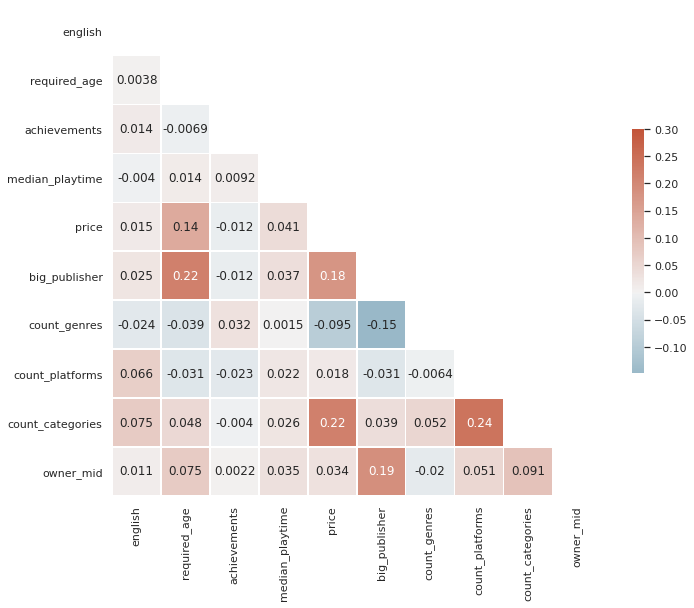

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# make a heatmap to preview the possibilities for correlation
sns.heatmap(df[numerical_features].corr(), annot=True,mask= mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the Heatmap, we can see that the **following features have great potential to be influential**:

  *  price 
  *  big_publisher
  *  owner_mid
  *  count_categories
  *  count_platforms \

It is **not surprising** to find ***price and mid point of owner number estimate*** being correlated with the ratio of positivity comment.\
 Size of player base infer popularity, price being the pre-conditions of affordability that limits participation and poppularity.
\

However, what **draws our attention** is that our assumption stands true that being released by a ***big publisher*** DO influencee \
the popularity, as defined by ratio of positive rating/ neegative ratings.Moreover, it further confirms that ***containing more varieties***\
 ***of categories and being published on more platforms*** have high correlation with popularity, instead of loosing its specialty.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Prediction of Logged Ratio with Different Market Strategies in Genres')

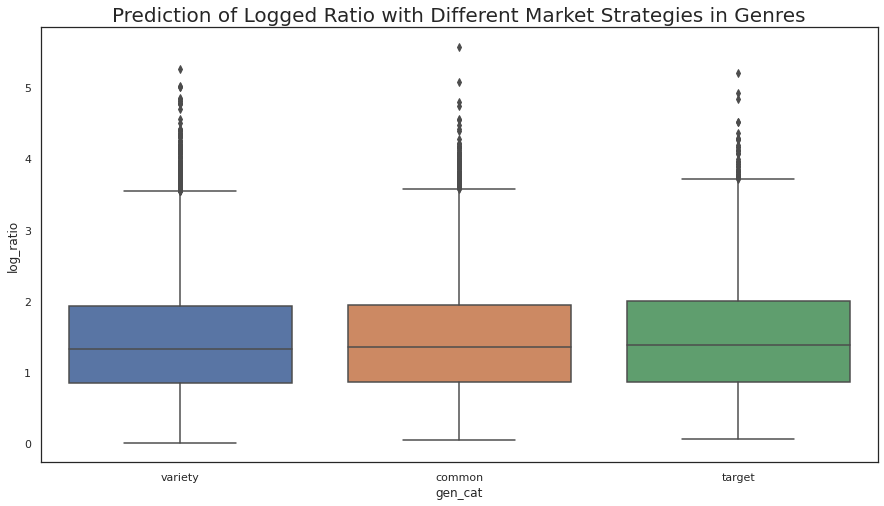

In [ ]:
# Box plot of Gen_cat against Y = log1p(ratio)
# make a boxplot of log_ratio by genres of game
genre_sorted = df[['gen_cat', 'log_ratio']].groupby('gen_cat').median().sort_values('log_ratio').reset_index()
plt.figure(figsize=(15, 8))
sns.boxplot(df.gen_cat, df.log_ratio, order= genre_sorted.gen_cat)
plt.title('Prediction of Logged Ratio with Different Market Strategies in Genres', fontsize = 20)


We can see that the more targeted the selection of genres, the more likely a game is to be successful, compared with broader coverage of varieties of genres among top 15 genres. In short, **as long as the most popular genres are covered, it does not matter much to have as much of popular genres covered as possible.**What matters it that the game is targetted with few popular genres, and that is enough to outperform others with more varieties of popular genrees covered.

In [ ]:
# TODO:  the data in to train, test, and validation.

from sklearn.model_selection import train_test_split
# X is the feature, Y is the label
# Takes in two dfs and output 4 dfs

# anytime 'time' is in df, do NOT split randomly. Split by time
# first 5 y as train, last 2 y as test
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
# Train a random forest regression model and compute validation predictions.

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(train_x, train_y)

val_pred = rfr.predict(val_x)
np.mean(np.abs(np.exp(val_pred) - np.exp(val_y)))
# np.mean(np.abs(val_pred - val_y))

4.035773740997833

## Log Transformation

**Scatter plot comparing predictions to the true labels - Ratio & LogRatio**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparison between predicted and actual value - ratio, RF1')

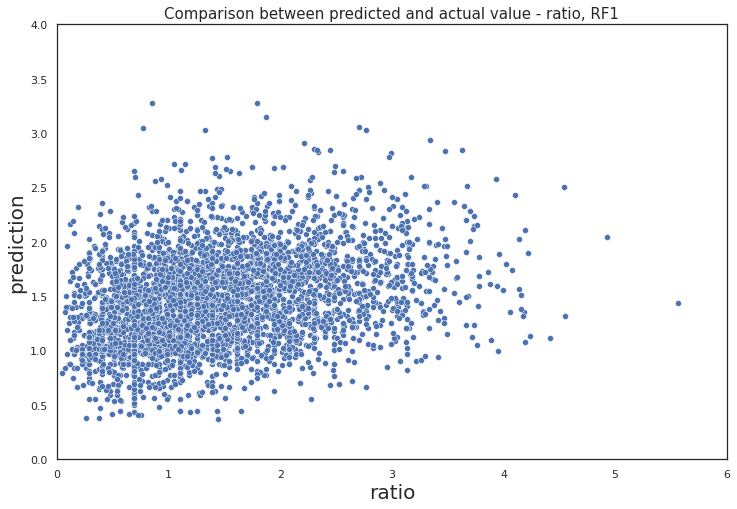

In [ ]:
# Scatter plot comparing predictions to the true labels - Ratio
plt.figure(figsize =(12, 8))
ax = sns.scatterplot(val_y, val_pred)
ax.set_ylim([0,4])
ax.set_xlim([0,6])
plt.ylabel('prediction', fontsize = 20)
plt.xlabel('ratio', fontsize = 20)
plt.title('Comparison between predicted and actual value - ratio, RF1', fontsize = 15)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparison between predicted and actual value - log1p(ratio), RF1')

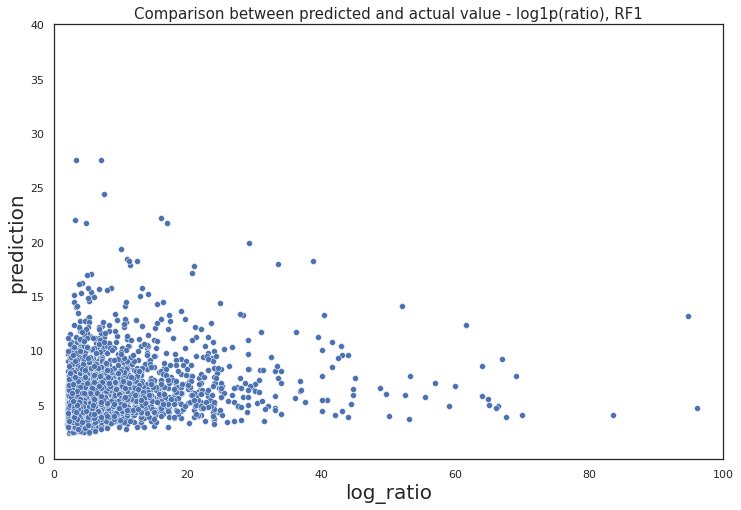

In [ ]:
# Scatter plot comparing predictions to the true labels - LogRatio
plt.figure(figsize =(12, 8))
ax = sns.scatterplot(np.exp(val_y) + 1, np.exp(val_pred) + 1)
ax.set_ylim([0,40])
ax.set_xlim([0,100])
plt.ylabel('prediction', fontsize = 20)
plt.xlabel('log_ratio', fontsize = 20)
plt.title('Comparison between predicted and actual value - log1p(ratio), RF1', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


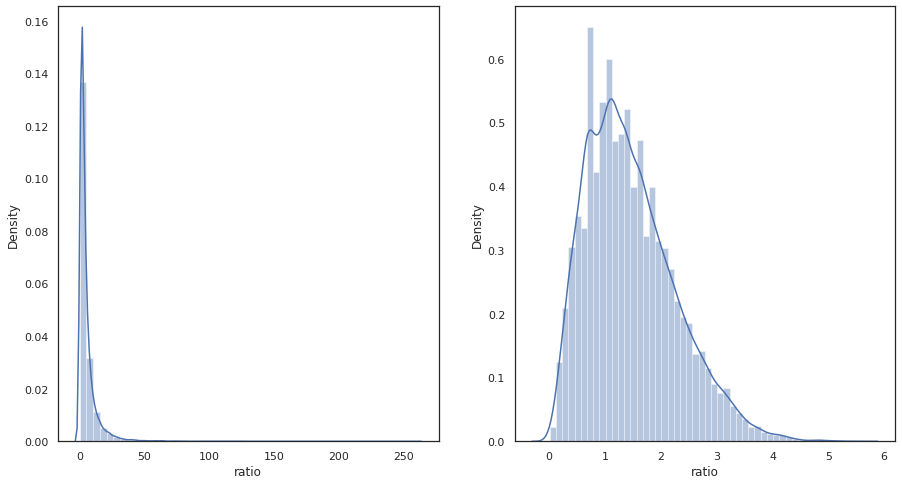

In [ ]:
# Plot histograms of ratio & log(ratio)

# original ratio
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.distplot(df.ratio)

# log transformed ratio
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df.ratio))

From the comparative charts below, we can see that **historgram of ratio in original unit is extremely skewed**. \
However, after applying **log1p transformation, it is much more Gaussian** than it used to be.

## Adding Categorical Feature into the model

In [ ]:
from sklearn.model_selection import train_test_split

# list out features
num_df = df[numerical_features]

# get one hot dummies on categorical variables
features_df = num_df.join(pd.get_dummies(df[['gen_cat']]))

X = features_df
Y = np.log1p(df['ratio'])

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

print(train_x.shape)


(15040, 13)


## Random Forest Regression

In [ ]:
# TODO: Train a new random forest regression model, compute the new validation error.

rfr = RandomForestRegressor()
rfr.fit(train_x, train_y)

val_pred = rfr.predict(val_x)
np.mean(np.abs(np.exp(val_pred) - np.exp(val_y)))

4.026309593084368

**What are some features of importance?**

  When applied feature importance ranking of random forest, we found that \
  ***achievements, price, count of categories, count of genrese, and median_playtime*** are all features of top importance \
  predicting our label Y. \
  Each of which with higher than 0.1 importance in our random forest modeling.

In [ ]:
rfr.feature_importances_

pd.DataFrame({'feature': train_x.columns, 
              'importance': rfr.feature_importances_}).sort_values('importance', ascending=False)

feature  importance
2       achievements    0.253812
4              price    0.221962
8   count_categories    0.127532
3    median_playtime    0.106349
9          owner_mid    0.079808
6       count_genres    0.079347
7    count_platforms    0.047491
12   gen_cat_variety    0.021332
10    gen_cat_common    0.017100
11    gen_cat_target    0.013704
0            english    0.013530
1       required_age    0.010795
5      big_publisher    0.007240

## Model Tuning:

In [ ]:
from sklearn.metrics import mean_absolute_error

def mae(model, x, log_labels):
    log_predictions = model.predict(x)
    mae = mean_absolute_error(np.exp(log_labels), np.exp(log_predictions))
    return mae

# Goal: mae(Lr, val_x, val_y) = validation error
# Mae(Lr, train_x, train_y) = training error

In [ ]:
# Print training and validation error for linear regression on the full dataset.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # Create model object
lr.fit(train_x, train_y) # Call fit on the training data

# Compute metrics
print("Train MAE", mae(lr, train_x, train_y))
print("Valid MAE", mae(lr, val_x, val_y))

Train MAE 3.8099888842705316
Valid MAE 3.9853748061958583


BRAVO! We have a **relatively small mae!** \
**The Training error is about the same as my validation error**. But the training error is lower than validation error. This is **underfitting, or high bias** which means the **model is not complex enough**! \

Therefore, we can need to tune the model TOWARDS complexity. \

BUT first, we need to check: Is it because **Data Size is not Enough?** \

*   Train a model on the first n train_size data points, and compute train and 
 validation errors


### Check training size

Text(0, 0.5, 'MAE')

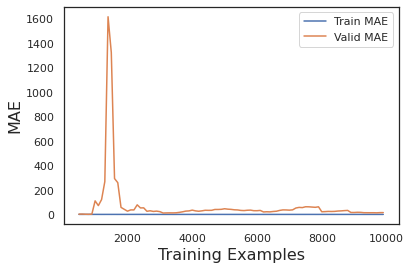

In [ ]:
# Compute train and validation MAEs for a linear regression model trained on the data for
# training sizes in range(500, 10000, 100)

# Goal: Train on a bunch of different dataset sizes, and look at the trends.
train_mae = []
valid_mae = []

train_sizes = list(range(500, 10000, 100))
# from first 500 entriese to first 10000 entries; increment 100

for train_size in train_sizes:
    #fit model
    lr = LinearRegression() 
    lr.fit(train_x.values[:train_size, :], train_y.values[:train_size])
    # errors
    train_mae.append(mae(lr, train_x.values[:train_size, :], train_y.values[:train_size]))
    valid_mae.append(mae(lr, val_x, val_y))

# Plot learning curves for training and validation MAE
plt.plot(train_sizes, train_mae)
plt.plot(train_sizes, valid_mae)
plt.legend(['Train MAE', 'Valid MAE'])

# always label your axes
plt.xlabel('Training Examples', fontsize=16)
plt.ylabel('MAE', fontsize=16)

From the chart above, we can see that
he impact of data size on model error stays relatively stable after training sample size exceed **4000** and moves even more stablee reaching **10000** entries.

In total, our df dataset has **23502** entries. With 80% being trainnig and 20% validation, we have in total **188441** entries in training dataset, exceeding 10000. \
So **it is NOT because data size is not enought that our model is underfitting!** More training data would not help.

### Non-Linear Model

We first modeled with Linear Regression and found the training error and validation error about the same. Which means **underfitting, or high bias**. We  later **exclude the possibility that the data size is not enough**. Now, let us try **non-linear model which increase complexity**. 

In [ ]:
# HistGradientBoostingRegressor is just a faster GradientBoostingRegressor (mostly)
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

# Train HistGradientBoostingRegressor on the data and print train and validation MAEs.
gbr = HistGradientBoostingRegressor(max_iter=1000)
gbr.fit(train_x, train_y)

print("Train MAE", mae(gbr, train_x, train_y))
print("Valid MAE", mae(gbr, val_x, val_y))

# validation mae lower
# training mae much lower!
# training mae < validation mae -> OVERFITTING

Train MAE 2.799065106222232
Valid MAE 3.965180663182212


We can see that the train mae is much lower than validation mae, meaning that our model tuning transfering into non-linear model has **overfit** - it is **too specific about training data that it does not generalize well into validation**.

To resolve overfitting, we can now try to use a less complex model OR add regulation. \
Here, let us try adding regulation:



### Add Regularization

In [ ]:
# Add l2 regularization to the GBR model.
gbr = HistGradientBoostingRegressor(max_iter=1000, l2_regularization=100.)  
# FIXME: Use GridSearch to pick the value "100"

gbr.fit(train_x, train_y)

HistGradientBoostingRegressor(l2_regularization=100.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=1000, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [ ]:
print("Train MAE", mae(gbr, train_x, train_y))
print("Valid MAE", mae(gbr, val_x, val_y))

Train MAE 3.2197539819263814
Valid MAE 3.880362285241073


Yay! We can see that a. train mae is LOWER than validation mae; and b. both maes are relatively small in prediction error, only a one-digit, lower than 5, 3.22 and 3.77 error. \
Compared with the model error using 
1.   **Linear Modeling**: 
*   Train MAE 3.8099888842705316
*   Valid MAE 3.9853748061958583
2.   Changing into **Non-linear Model**
*   Train MAE 2.799065106222232
*   Valid MAE 3.965180663182212
3.   Now **adding Regularization**:
*   Train MAE 3.2197539819263814
*   Valid MAE 3.880362285241073 \

**Both our maes for validation DECREASED, and our overfit and underfit is pretty much RESOLVED.** \

After changing our model from linear to nonlinear and adding regularization, we reached a point of relative perfection!

## Test the Error - Point of No Return!

In [ ]:
test_pred = rfr.predict(test_x)
np.mean(np.abs(np.exp(test_pred) - np.exp(test_y)))

3.81293973845025

YAY!! \
We got a **test error** of 3.808738019045779! This is **even lower than our validation mae** 3.880362285241073 for the last tuning. \
**Point of No return and we are stars**!

# Limitations and Future Direction

The main challenges we faced in training the model include three aspects: first, the dataset was not large enough, and the popularity of a game can be influenced by way too many variables so there was not a strong correlation. Our data was limited in terms of number of games and features. There are many datasets available but it's hard to merge them. In the future, we could get more data and perform a more informative analysis; \
\
Second, we did not have enough time to tokenize the description of a game, to conduct sentimental analysis on reviews and comments, or to apply neural network on picture analysis of games;\
\
Last, video games is a huge business with multiple platforms and genres, which we find difficult to cover. In this project we focused on pc games that are available on Steam, but in the future we expect to see a thriving gaming industry built on playstation, VR settings, and other advanced technologies.